## Lending Club Case Study

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, ie . the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

#### Importing required python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Load the given csv into a dataframe 

In [2]:
loan_df = pd.read_csv("loan.csv", low_memory=False)

# Viewing the top 5 rows of the dataframe
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

<h5 style="color: green;">Observation: There are columns with mixed data types</h4>

####  Check for incorrect, summary or blank rows

In [3]:
loan_df[loan_df['id'].isna()]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, ...]
Index: []

[0 rows x 111 columns]

#### Display the summary of the dataframe

In [4]:
loan_df.info()
loan_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


(39717, 111)

### Perform Data Clean-up

##### (i) Checking for any missing column names

In [5]:
# Get the column names
column_names = loan_df.columns

# Check if any column names are null, Nan or empty
missing_columns = column_names[column_names.isna() | column_names.isnull() | (column_names == '')]

missing_columns.shape

(0,)

<h5 style="color: green;">Observation: No columns with missing names</h4>

##### (ii) Identify and drop columns with missing values

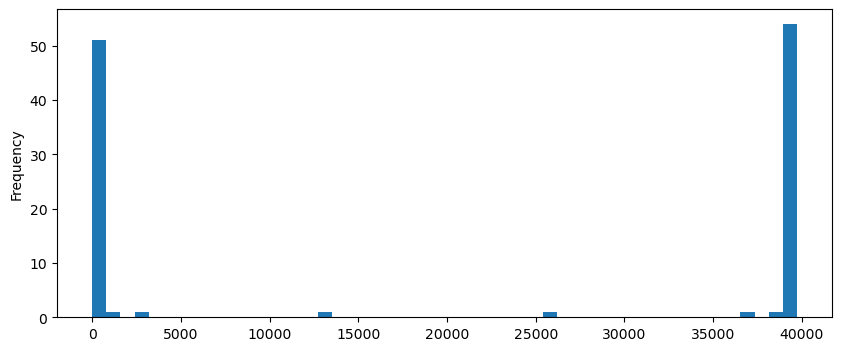

In [6]:
# Listing columns that have NULLs from columns of the loan dataframe
c = loan_df.isnull().sum()
c.plot(kind='hist', bins=50, figsize = (10,4))
plt.show()

<h5 style="color: green;">Observation: There are some columns with missing values for almost all rows</h5>

In [7]:
# We see there are huge number of rows with no data in some columns
# Given total rows are 39717, lets get count of coulumns having null for more than 10000 rows
c.loc[(c.values > 10000) & (c.values < 39717)].sort_values()

desc                      12942
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [8]:
#drop all columns having above 10K NULL values in them.
loan_df.drop(columns=list(c[c.values > 10000].index), inplace=True)
loan_df.shape

(39717, 53)

##### (ii) Identify columns with unique or single values

In [9]:
column_unique = loan_df.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [10]:
#Dropping columns with single value 
c1 = column_unique[column_unique.values == 1]
c1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [11]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

##### (iii) Select required columns into a new dataframe

<h5 style="color: green;">Assumption: Below are the required numerical and categorical columns</h5>


In [12]:
cleaned_loan_df = loan_df[["id","purpose","loan_amnt", "annual_inc", "term", "int_rate", "installment", "grade", "sub_grade", "emp_length", "verification_status", "home_ownership", "loan_status", "dti", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "application_type", "acc_now_delinq", "pub_rec_bankruptcies", "tax_liens","addr_state","issue_d"]]

In [13]:
cleaned_loan_df.shape
cleaned_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   purpose                  39717 non-null  object 
 2   loan_amnt                39717 non-null  int64  
 3   annual_inc               39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  verification_status      39717 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  loan_status              39717 non-null  object 
 13  dti                      39717 non-null  float64
 14  delinq_2yrs           

##### (iv) Check for duplicate rows

In [14]:
# Checking if any duplicate rows are present in the data by dropping duplicates into a temporary data frame
df_for_duplicate_check = loan_df['id'].drop_duplicates()
df_for_duplicate_check.shape

(39717,)

<h5 style="color: green;">Observation: No duplicate rows found</h5>

##### (v) For the column 'term' - remove the words 'months' and  if any spaces


In [15]:
cleaned_loan_df["term"] = cleaned_loan_df["term"].apply(lambda x: int(x.strip()[:2]))


In [16]:
cleaned_loan_df["term"]

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

##### (vi) Removing % symbol from int_rate column

In [17]:
cleaned_loan_df['int_rate'] = cleaned_loan_df['int_rate'].replace({'%': ''}, regex=True).astype(float)


In [18]:
cleaned_loan_df["int_rate"]

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

##### (viii) Segment data: Selecting only Fully-Paid and Charged Off data

In [19]:
# removing rows with loan_status = "Current"
# As these loans will not help in identifiying defaulters

cleaned_loan_df = cleaned_loan_df[cleaned_loan_df["loan_status"] != "Current"]

##### (viii) Identify and remove Outliers using Interquartile Range Method

In [20]:
#We are assuming the below columns as relevant for analysis and removing the outliers on them
#loan_amnt , annual_inc, dti , revol_bal, total_acc

In [21]:
# Define a function to remove outliers
def remove_outliers(cleaned_loan_df, column):
    Q1 = cleaned_loan_df[column].quantile(0.25)
    Q3 = cleaned_loan_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return cleaned_loan_df[(cleaned_loan_df[column] >= lower_bound) & (cleaned_loan_df[column] <= upper_bound)]

# Apply the function to relevant columns
for column in ['loan_amnt', 'annual_inc', 'dti', 'revol_bal', 'total_acc']:
    cleaned_loan_df = remove_outliers(cleaned_loan_df, column)

##### (ix) Perform Data validation on fields

In [22]:
# loan_amount >= funded_amnt
# term should be either 36 months or 60 months
# grades - A to G
# home_ownership - 'OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE'
# verification_status - "Verified", "Source Verified", "Not Verified"
# issue_d should be valid date
# revol_bal - it should be non-negative
# revol_util - it should be between 0% to 100%

In [23]:
# term should be either 36 months or 60 months
cleaned_loan_df[~ ((cleaned_loan_df["term"] == 36) | (cleaned_loan_df["term"] == 60)) ]

Empty DataFrame
Columns: [id, purpose, loan_amnt, annual_inc, term, int_rate, installment, grade, sub_grade, emp_length, verification_status, home_ownership, loan_status, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, total_rec_late_fee, recoveries, collection_recovery_fee, application_type, acc_now_delinq, pub_rec_bankruptcies, tax_liens, addr_state, issue_d]
Index: []

[0 rows x 30 columns]

In [24]:
# grades - A to G
cleaned_loan_df[~ (cleaned_loan_df["grade"].isin(['A','B','C','D','E','F','G'])) ]

Empty DataFrame
Columns: [id, purpose, loan_amnt, annual_inc, term, int_rate, installment, grade, sub_grade, emp_length, verification_status, home_ownership, loan_status, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, total_rec_late_fee, recoveries, collection_recovery_fee, application_type, acc_now_delinq, pub_rec_bankruptcies, tax_liens, addr_state, issue_d]
Index: []

[0 rows x 30 columns]

In [25]:
# home_ownership - 'OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE'
cleaned_loan_df[~ (cleaned_loan_df["home_ownership"].isin(['OWN', 'MORTGAGE', 'RENT', 'OTHER'])) ]
# There are 3 Fully Paid loans with home_ownership as NONE.
# We will remove these 3 loans as they are Fully Paid and not contributing significantly towards defaulters.
cleaned_loan_df = cleaned_loan_df[(cleaned_loan_df["home_ownership"].isin(['OWN', 'MORTGAGE', 'RENT', 'OTHER'])) ]

In [26]:
# verification_status - "Verified", "Source Verified", "Not Verified"
cleaned_loan_df[~(cleaned_loan_df['verification_status'].isin(['Verified','Source Verified','Not Verified']))]

Empty DataFrame
Columns: [id, purpose, loan_amnt, annual_inc, term, int_rate, installment, grade, sub_grade, emp_length, verification_status, home_ownership, loan_status, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, total_rec_late_fee, recoveries, collection_recovery_fee, application_type, acc_now_delinq, pub_rec_bankruptcies, tax_liens, addr_state, issue_d]
Index: []

[0 rows x 30 columns]

In [27]:
# revol_bal - it should be non-negative
cleaned_loan_df[ cleaned_loan_df["revol_bal"] < 0 ]

Empty DataFrame
Columns: [id, purpose, loan_amnt, annual_inc, term, int_rate, installment, grade, sub_grade, emp_length, verification_status, home_ownership, loan_status, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, total_rec_late_fee, recoveries, collection_recovery_fee, application_type, acc_now_delinq, pub_rec_bankruptcies, tax_liens, addr_state, issue_d]
Index: []

[0 rows x 30 columns]

##### (x) Extracting the month and year from the issue_d column

In [28]:
cleaned_loan_df["issue_month"] = pd.to_datetime(cleaned_loan_df["issue_d"],format='%b-%y').dt.month
cleaned_loan_df["issue_year"] = pd.to_datetime(cleaned_loan_df["issue_d"],format='%b-%y').dt.year

### Perform Data Analysis using Univariate , Segmented Univariate , Bivariate and Multivariate 

In [29]:
#Get count of different loan status 
cleaned_loan_df['loan_status'].value_counts()

loan_status
Fully Paid     28330
Charged Off     4814
Name: count, dtype: int64

##### Univariate Analysis : Plotting graph to understand the distribution of data by numerical columns

<h5 style="color:green";>Assumption : We will consider the below numerical columns for analysis</h5>
<ul>
    <li style="color:green";>loan_amnt</li>
    <li style="color:green";>int_rate</li>
    <li style="color:green";>annual_inc</li>
    <li style="color:green";>dti</li>
</ul>
    

##### Segmenting data based on loan_status

In [30]:
charged_off_loan_df = cleaned_loan_df[cleaned_loan_df["loan_status"] == 'Charged Off']
charged_off_loan_df.shape

(4814, 32)

In [31]:
fully_paid_loan_df = cleaned_loan_df[cleaned_loan_df["loan_status"] == 'Fully Paid']
fully_paid_loan_df.shape

(28330, 32)

In [32]:
numerical_columns = ['loan_amnt', 'int_rate', 'dti', 'annual_inc']

##### Univariate Analysis for Numerical Columns

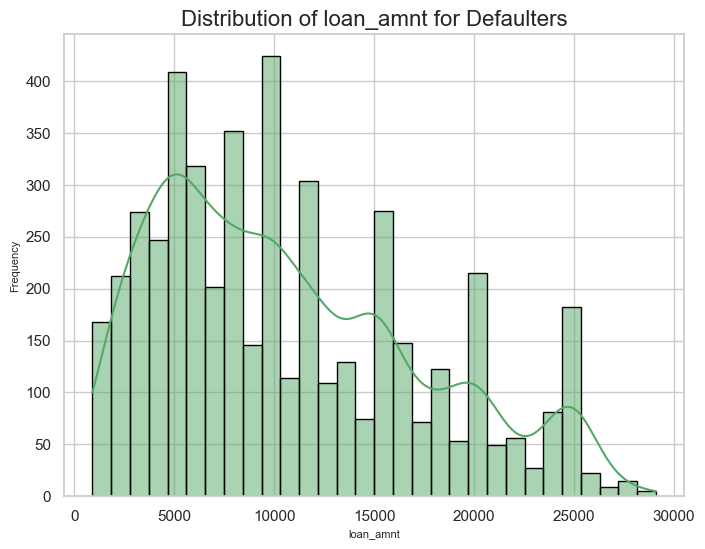

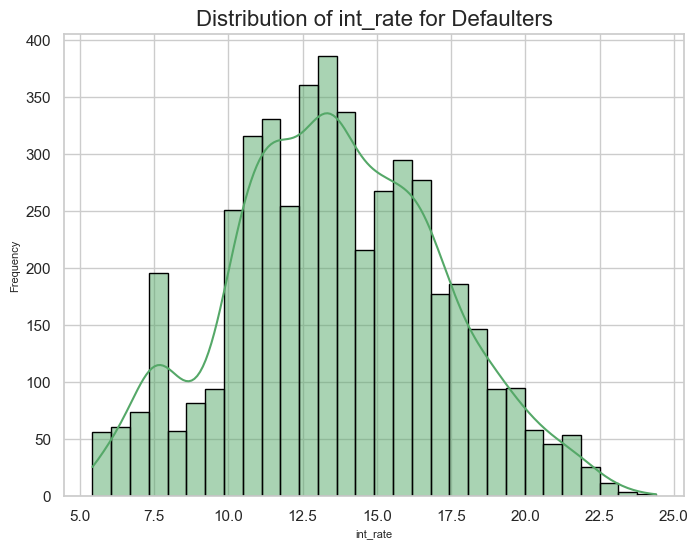

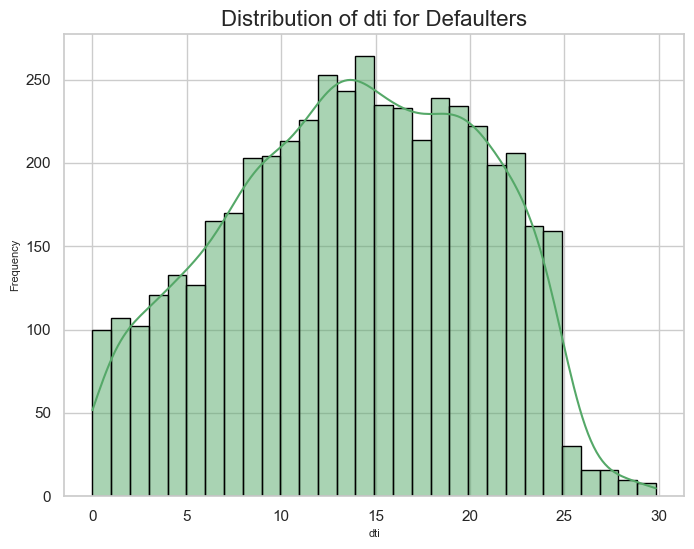

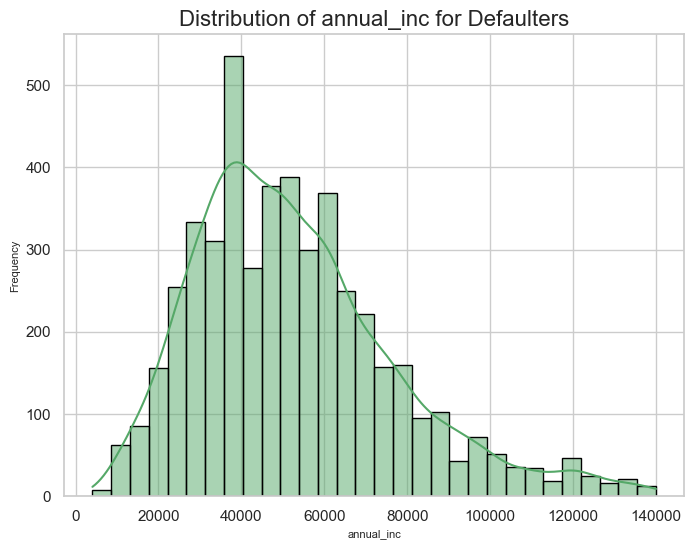

In [33]:

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the distribution of each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(
        charged_off_loan_df[column],  
        bins=30,                     
        color='g',                   
        kde=True,                    
        edgecolor='black'            
    )
    plt.title(f'Distribution of {column} for Defaulters', fontsize=16)
    plt.xlabel(column, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.grid(True)  # Add grid lines for better readability
    plt.show()

<h5 style="color:green;">Following are the observations from the above plots:</h5>
<ul style="colo:rgreen;">
  <li>The number of defaulters with loan amounts ranging from $3k to $12k is higher.</li>
  <li>Loan applicants with annual incomes between $2k and $8k have a higher number of defaulters.</li>
  <li>The number of loan defaulters increases with higher DTI values.</li>
  <li>Defaulters are more common at interest rates between 10% and 18%.</li>
</ul>


<Figure size 800x600 with 0 Axes>

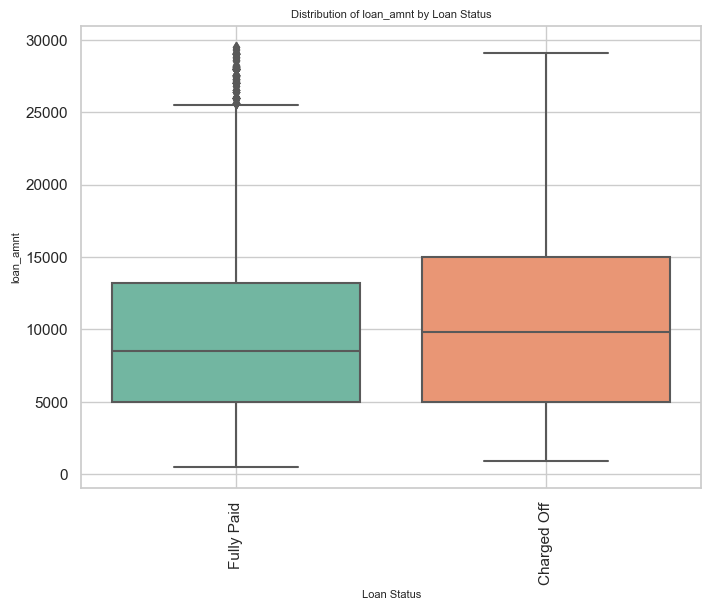

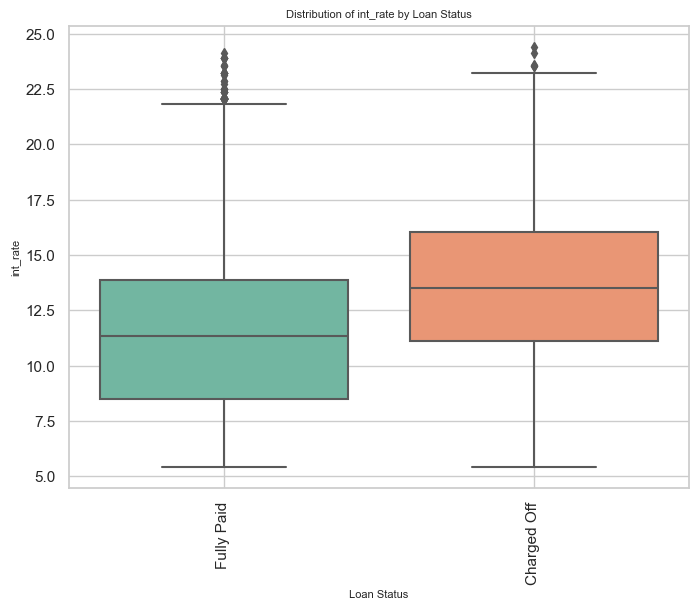

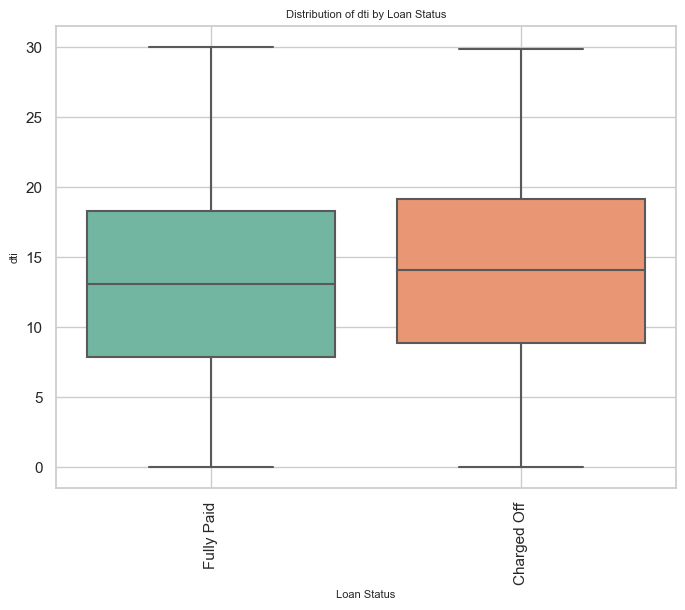

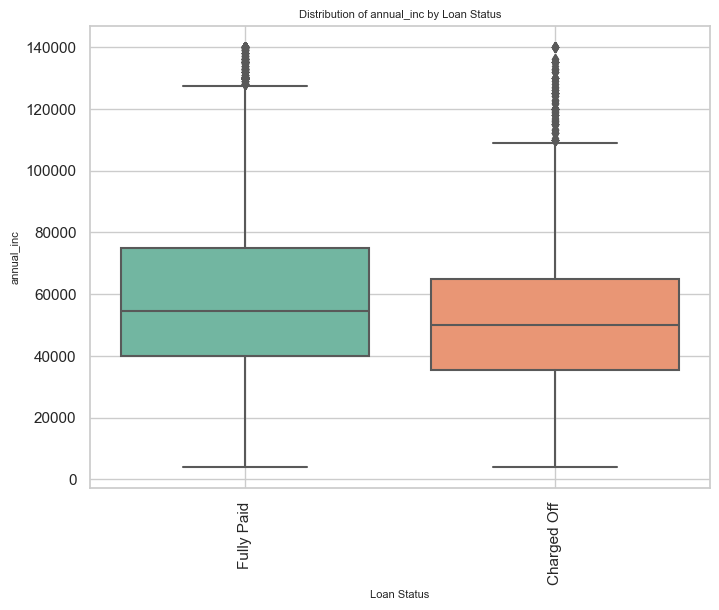

In [34]:
# Set Seaborn style
sns.set(style="whitegrid")

# Set up the figure size
plt.figure(figsize=(8, 6))

# Loop through each column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cleaned_loan_df["loan_status"], y=cleaned_loan_df[column], palette="Set2")
    plt.title(f'Distribution of {column} by Loan Status', fontsize=8)
    plt.xlabel('Loan Status', fontsize=8)
    plt.ylabel(column, fontsize=8)
    plt.xticks(rotation=90)  
    plt.grid(True)
    plt.show()

<h5 style="color:green;">Following are the observations from the above plots:</h5>
<ul style="colorgreenn;">
  <li>The distribution of loan status is even across the loan amount range.</li>
  <li>The interest rate (int_rate) for loans with a status of defaulters is higher compared to fully paid loans.</li>
</ul>


#### Considering below categorical columns for analysis

In [35]:
categorical_columns = ['home_ownership', 'verification_status', 'purpose', 'emp_length', 'grade', 'term', 'addr_state']

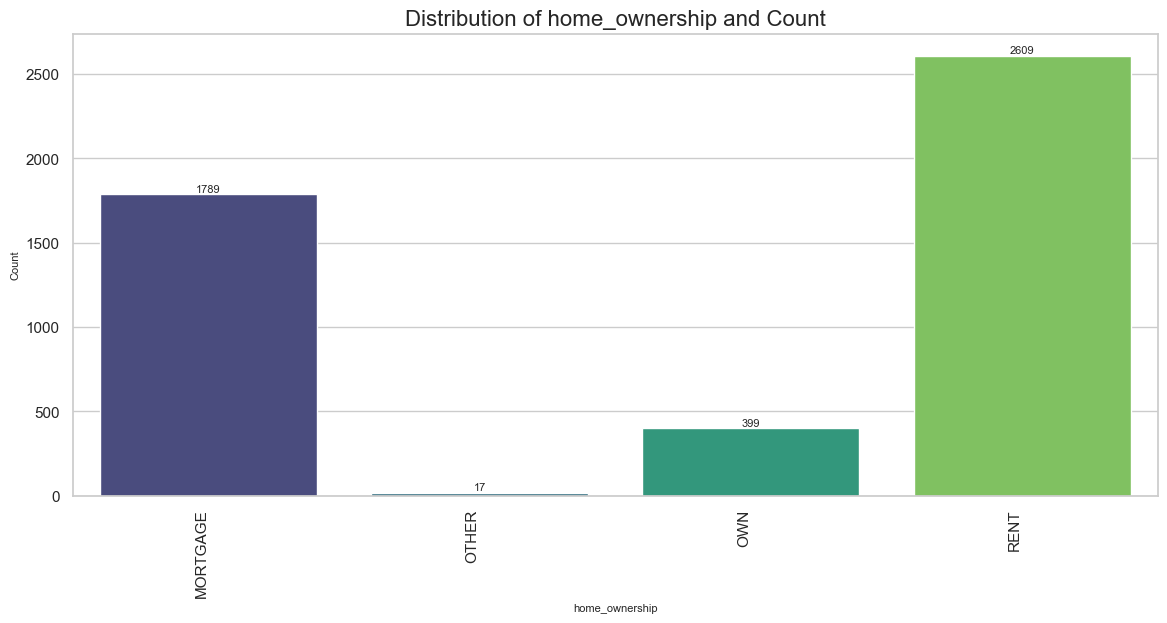

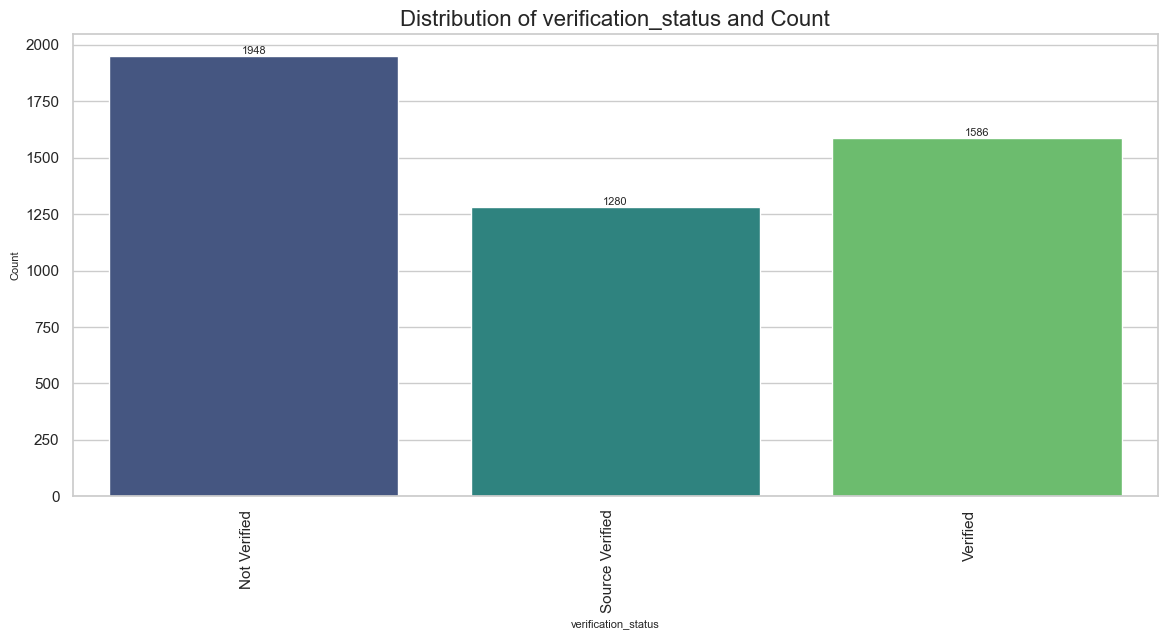

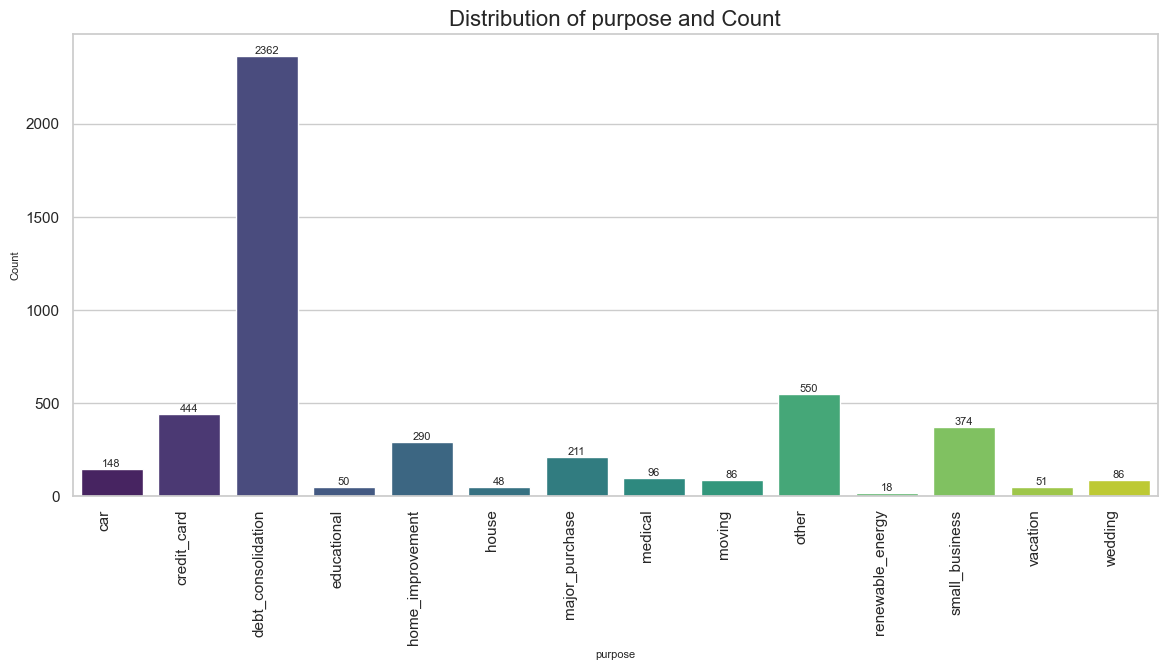

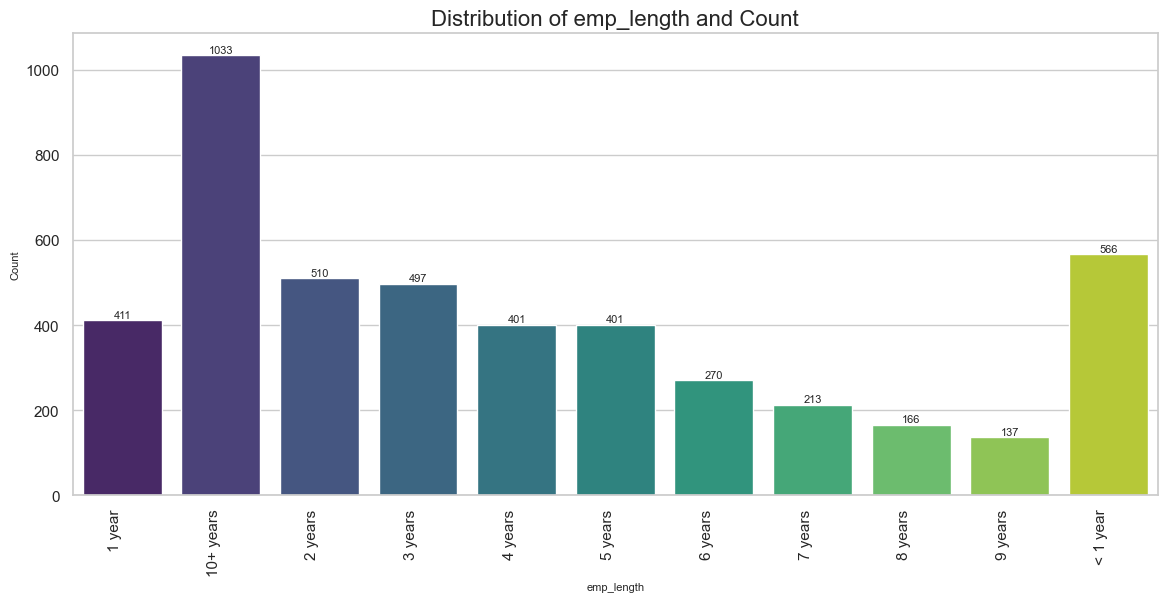

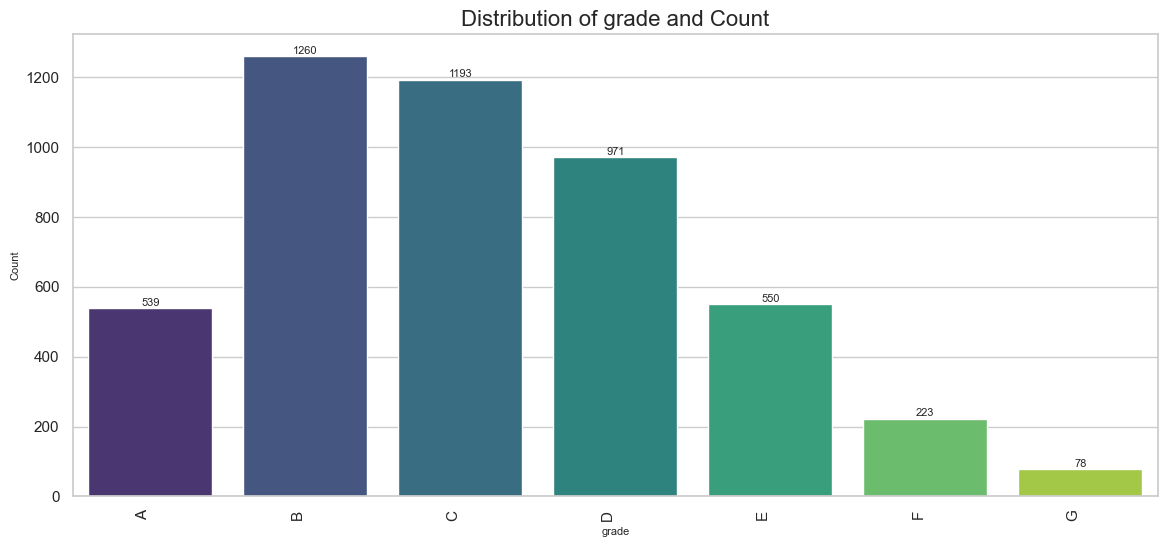

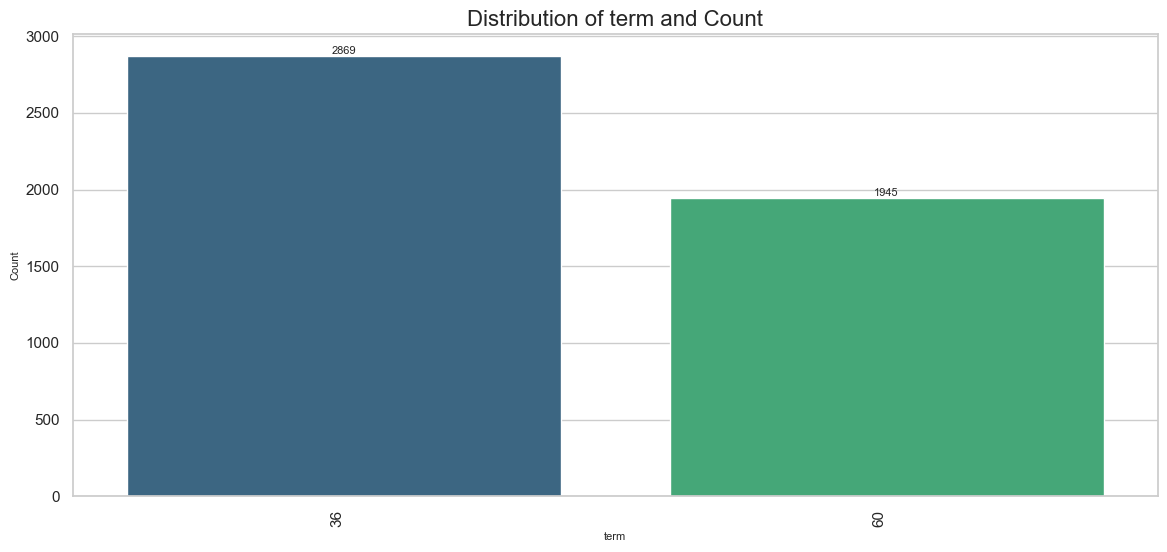

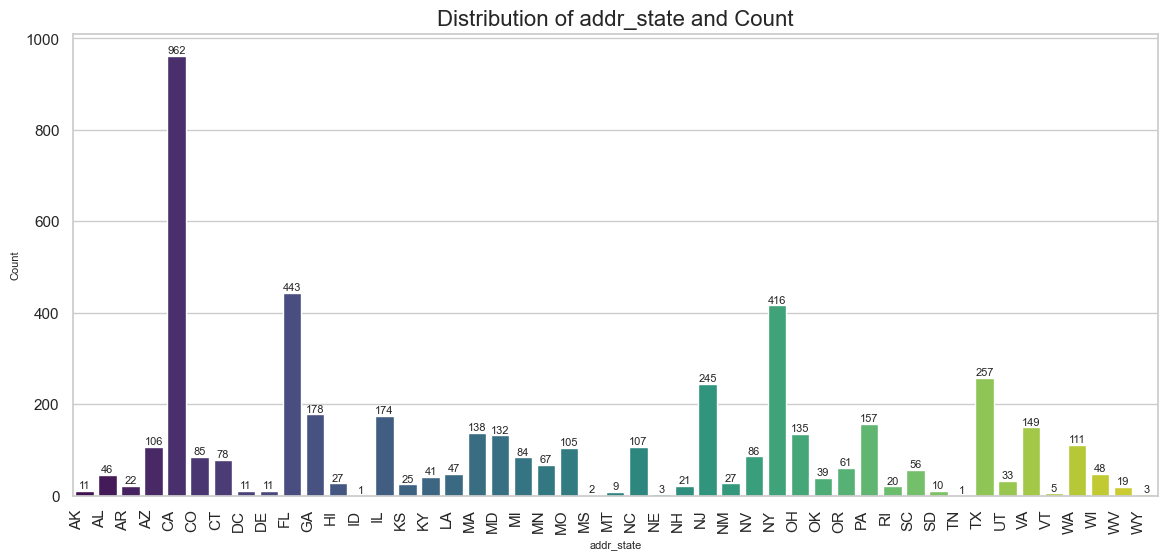

In [36]:
# Set Seaborn style
sns.set(style="whitegrid")

# Loop through each categorical column
for cat_column in categorical_columns:
    plt.figure(figsize=(14, 6))
    
    # Get counts of each category
    cat_counts = charged_off_loan_df[cat_column].value_counts().sort_index()
    
    # Create the bar plot using Seaborn
    sns.barplot(x=cat_counts.index, y=cat_counts.values, palette="viridis")
    
    # Add value labels on the bars
    for index, value in enumerate(cat_counts.values):
        plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=8)
    
    # Add title and labels
    plt.title(f'Distribution of {cat_column} and Count', fontsize=16)
    plt.xlabel(cat_column, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    
    # Rotate x-axis labels if necessary
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

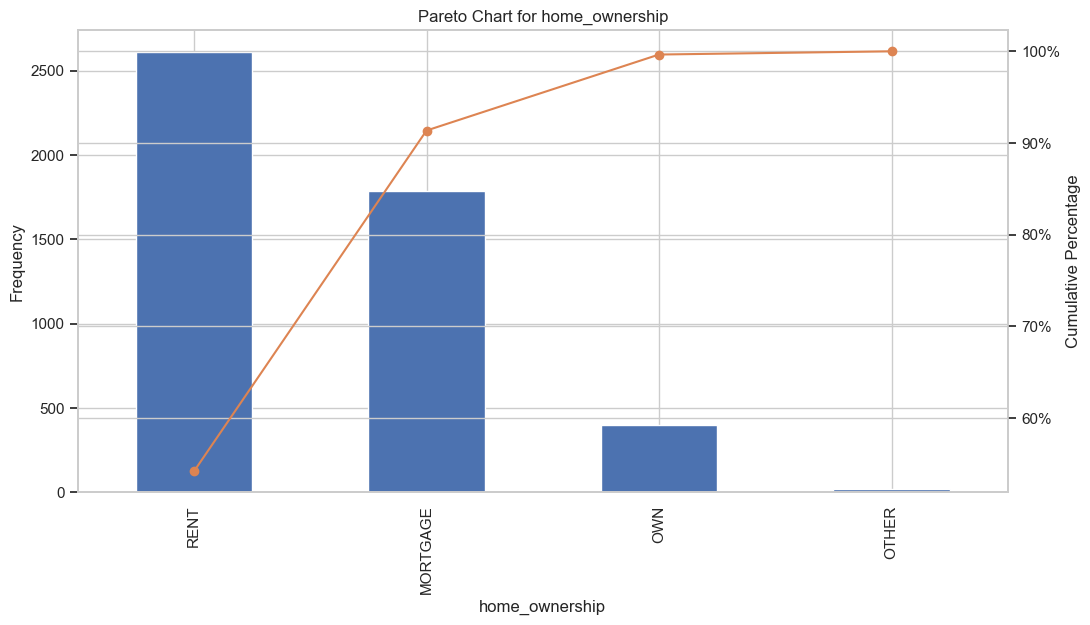

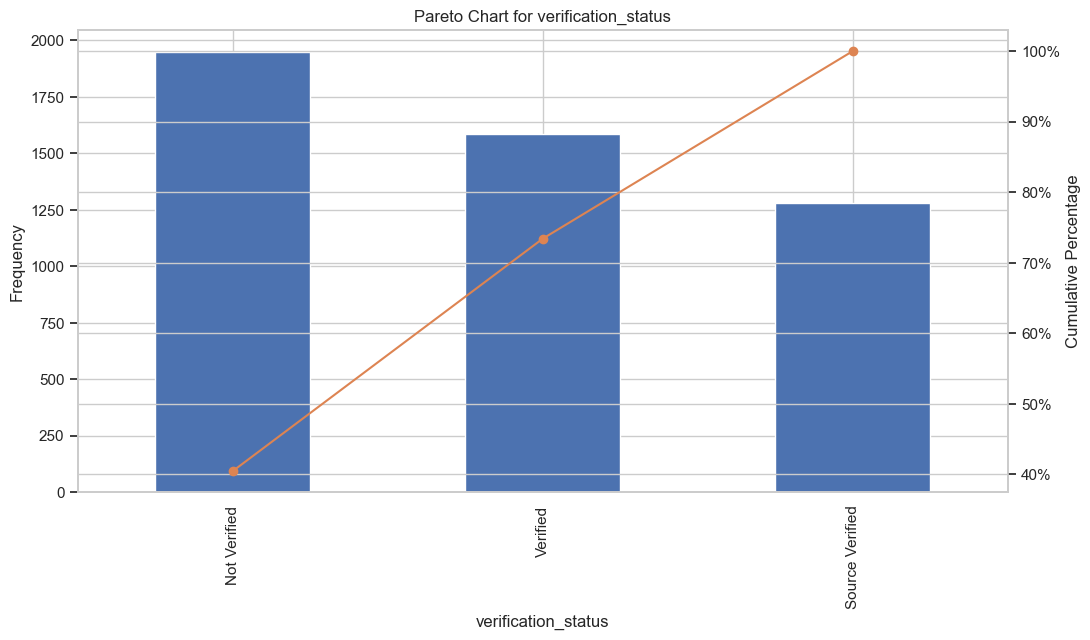

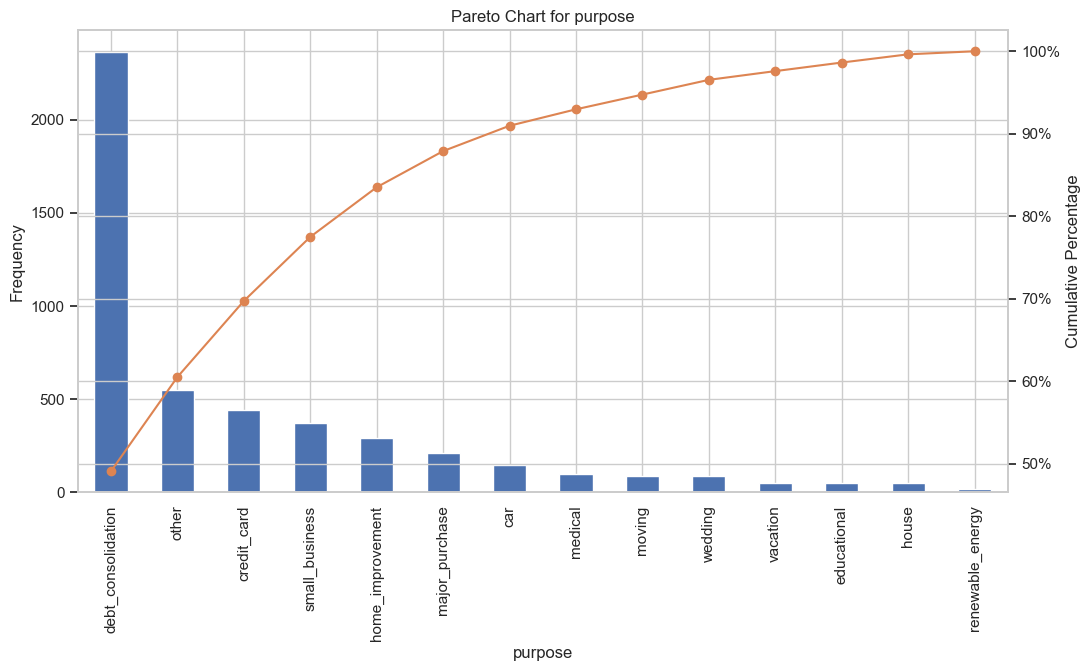

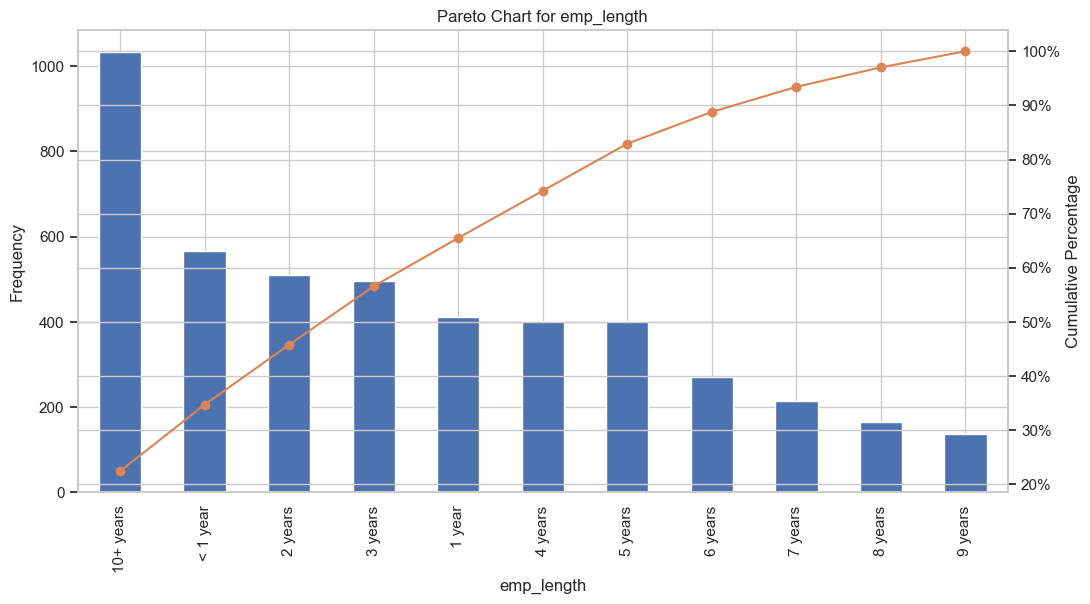

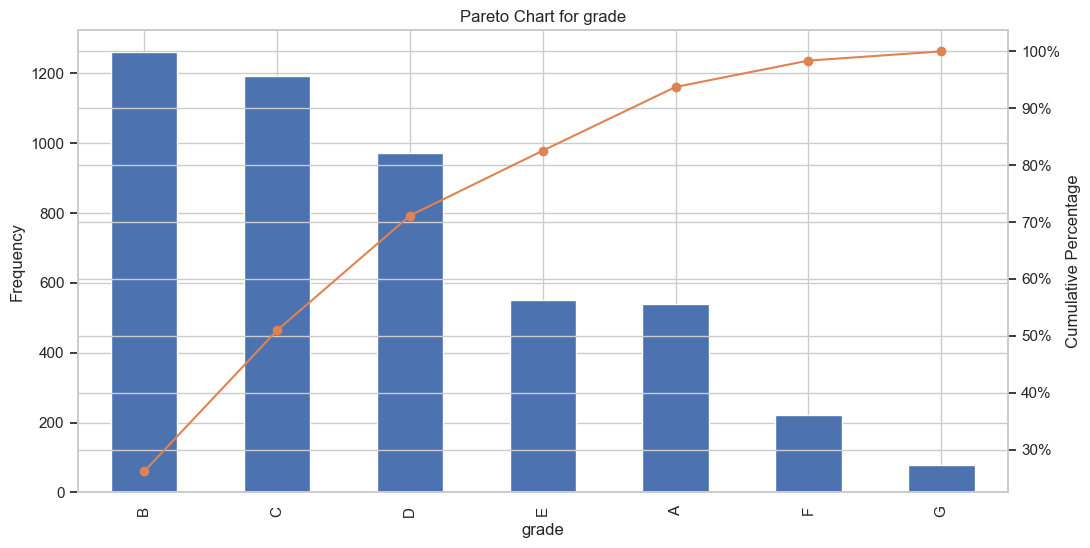

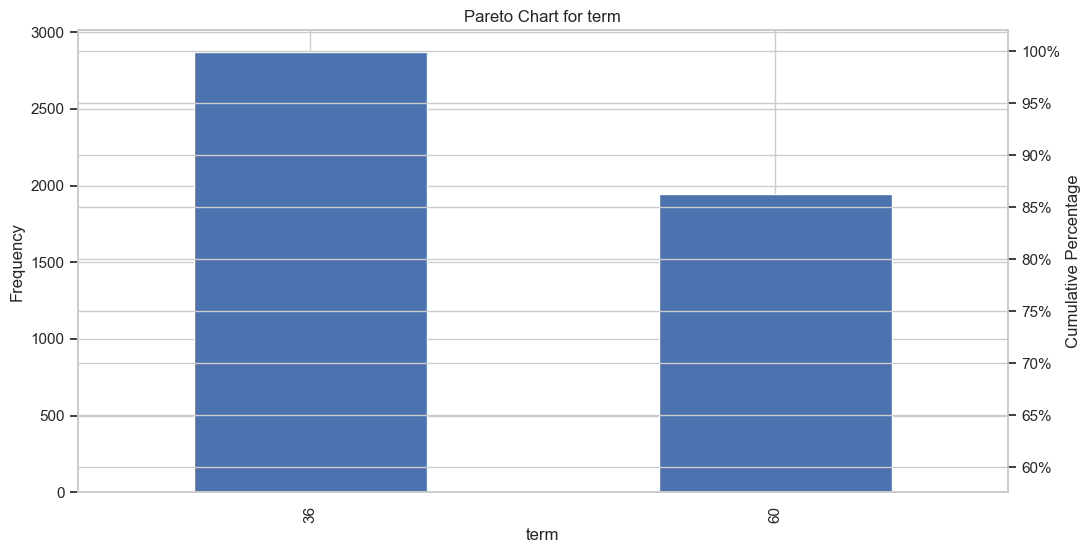

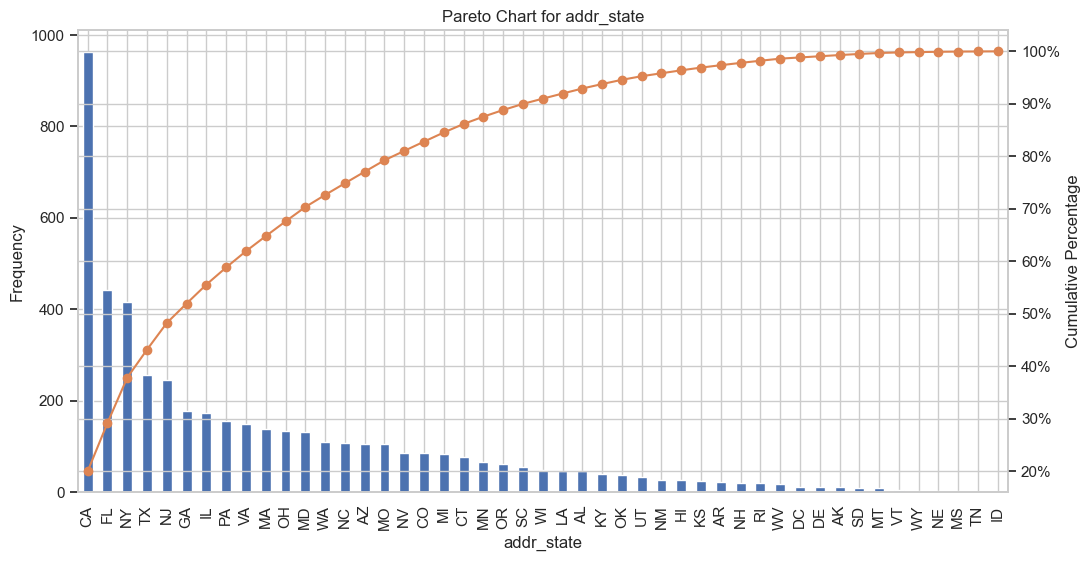

In [37]:
# Pareto Analysis of categorical variable. 
# This is an extension of the Bar plot analysis, which is easier to infer.
def plot_pareto_chart(data, column):
    counts = data[column].value_counts()
    sorted_counts = counts.sort_values(ascending=False)
    cumulative_percentage = sorted_counts.cumsum() / sorted_counts.sum() * 100

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Bar plot
    sorted_counts.plot(kind='bar', ax=ax1, color='C0')
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'Pareto Chart for {column}')

    # Cumulative percentage line
    ax2 = ax1.twinx()
    cumulative_percentage.plot(ax=ax2, color='C1', marker='o', linestyle='-')
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))
    ax2.set_ylabel('Cumulative Percentage')

    plt.show()

for cat_column in categorical_columns:
    plot_pareto_chart(charged_off_loan_df, cat_column)

<h5 style="color:green;">Observations for defaulters based on the plots:</h5>
<ul style="colorgreenn;">
  <li>Homeownership values for defaulters are ranked as follows: RENT > MORTGAGE > OWN > OTHER.</li>
  <li>Verification Status values for defaulters are ranked as: Not Verified > Verified > Source Verified.</li>
  <li>Debt consolidation is the most common purpose among defaulters.</li>
  <li>Defaulters with an employment length of 10+ years are notably high.</li>
  <li>Grade values for defaulters are ranked as: B > C > D > A > E > F > G.</li>
  <li>Defaulters with a term of 36 months are more common than those with a term of 60 months.</li>
  <li>California (CA) has the highest number of defaulters, followed by FL, NY, TX, and NJ.</li>
</ul>
>
</ul>


##### Analyzing the Number of loan applications increasing yearly and monthly within each year

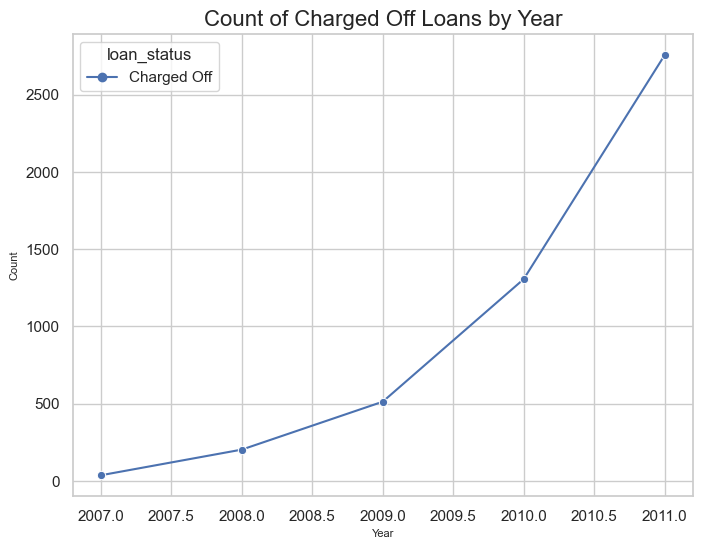

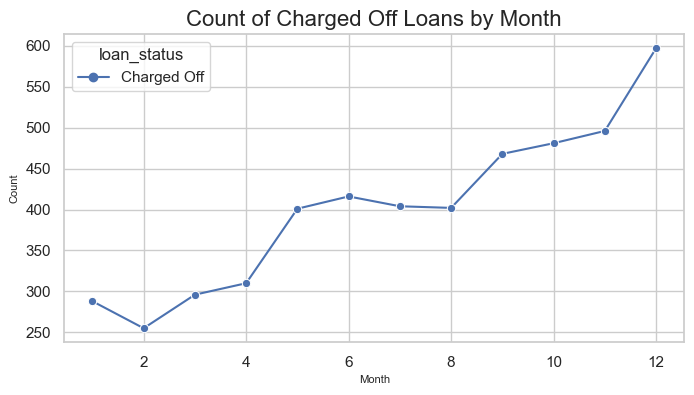

In [38]:

#Time dependent plot with issue year
grouped_by_year = charged_off_loan_df.groupby(['issue_year', 'loan_status']).size().unstack(fill_value=0)

# Plot the yearly data
plt.figure(figsize=(8, 6))
sns.lineplot(data=grouped_by_year, markers=True)
plt.title('Count of Charged Off Loans by Year', fontsize=16)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.grid(True)
plt.show()

# Time dependent plot with issue month
grouped_by_month = charged_off_loan_df.groupby(['issue_month', 'loan_status']).size().unstack(fill_value=0)

# Plot the monthly data
plt.figure(figsize=(8, 4))
sns.lineplot(data=grouped_by_month, markers=True)
plt.title('Count of Charged Off Loans by Month', fontsize=16)
plt.xlabel('Month', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.grid(True)
plt.show()


<h5 style="color:green;">Following are the observations from the above plots:</h5>
<ul style="colorgreenn;">
  <li>The number of defaulters is increasing monthly.</li>
  <li>The number of defaulters is increasing yearly.</li>
</ul>


#### Perform Bivariate analysis on variables which had high variation in univariate analysis

##### Analyzing the Grade category by plotting subgrades within each grade to uncover patterns.
##### This bivariate analysis focuses on the `grade` and `sub_grade` columns.


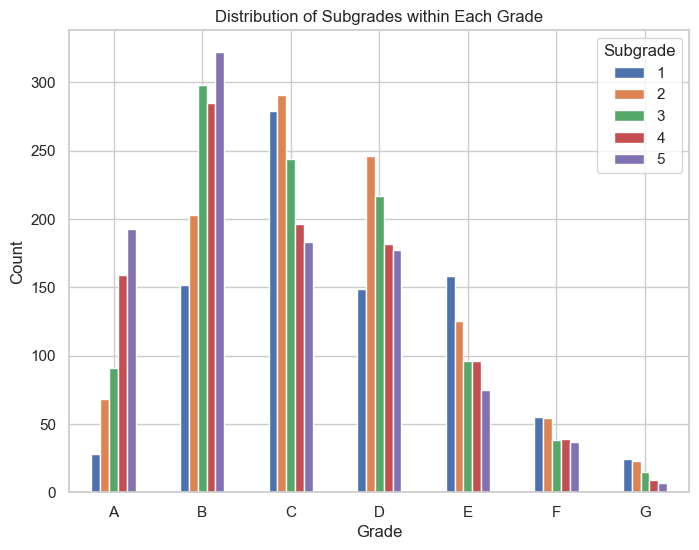

In [39]:

# Select relevant columns and derive sub_grade without the first character
charged_off_grades = charged_off_loan_df[['grade', 'sub_grade']]
charged_off_grades['sub_grade_num'] = charged_off_grades['sub_grade'].str[1:]

# Create a pivot table counting the occurrences of each sub_grade within each grade
grade_subgrade_counts = charged_off_grades.pivot_table(index='grade', columns='sub_grade_num', aggfunc='size', fill_value=0)

# Plot the pivot table as a bar chart
grade_subgrade_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of Subgrades within Each Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Subgrade')
plt.show()


<h5 style="color:green;">Observations:</h5>
<ul style="colorgreenn;">
  <li>The highest number of defaulters are in grades B and C.</li>
  <li>Subgrades B3, B4, B5, C1, C2, and C3 have the most defaulters.</li>
</ul>


##### The plots reveal patterns in home ownership values for defaulters.
##### Further analysis will explore home ownership in relation to other categories to identify more significant patterns.


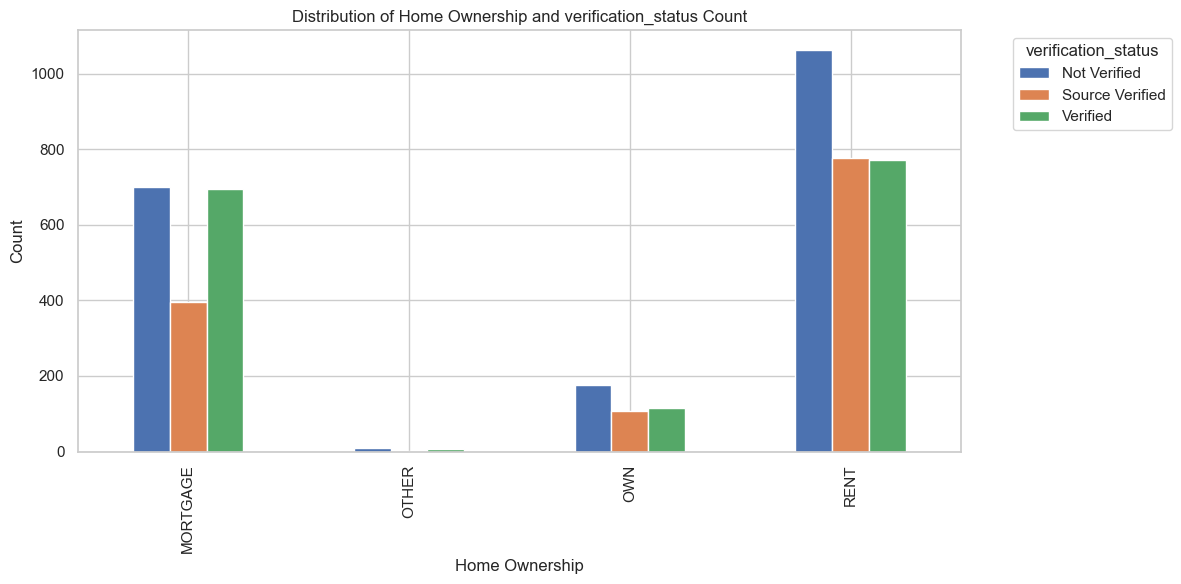

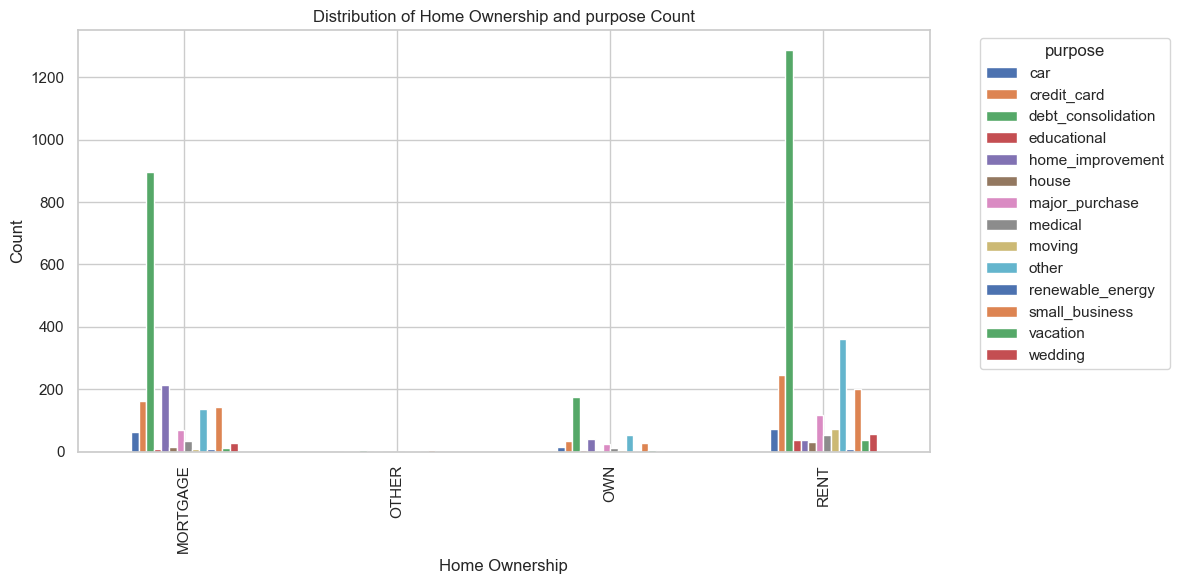

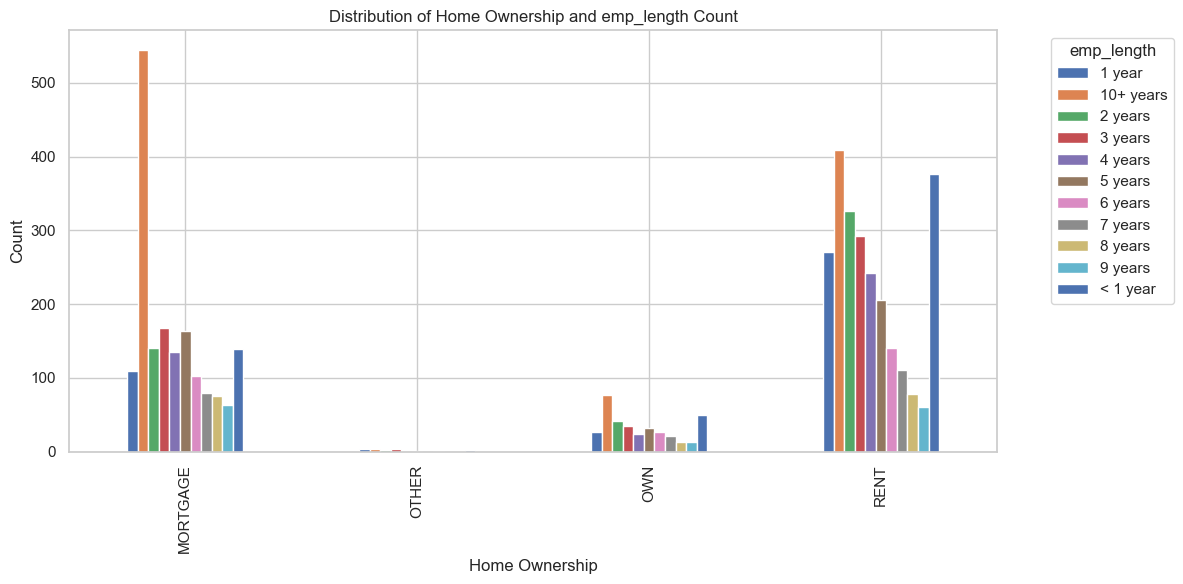

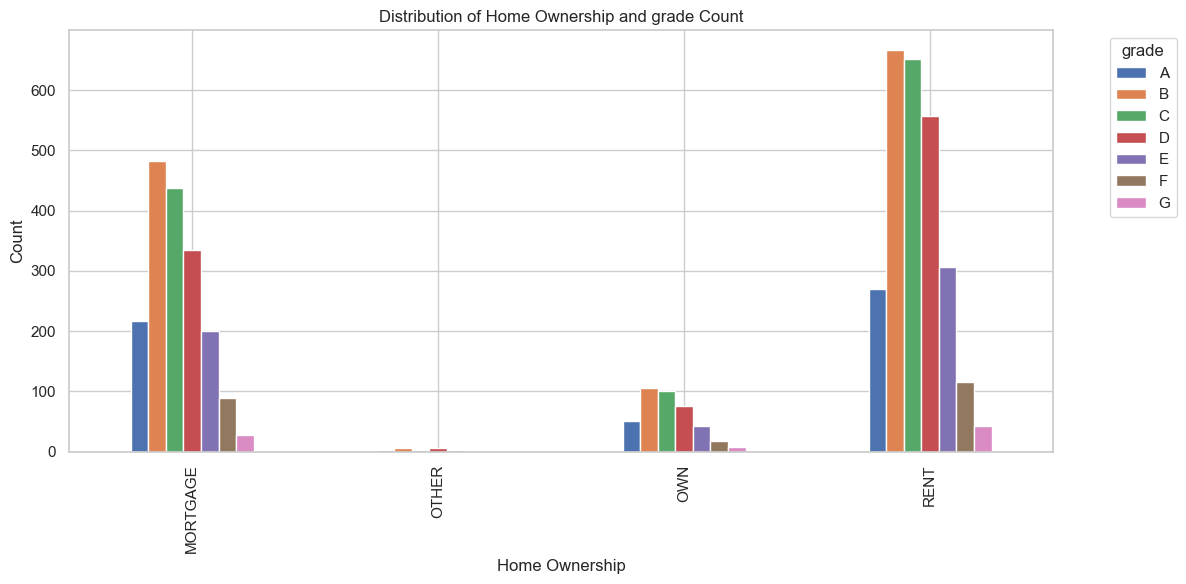

In [40]:
columns_for_analysis = ['verification_status', 'purpose', 'emp_length', 'grade']

for col in columns_for_analysis:
    pivot_table = charged_off_loan_df.pivot_table(index="home_ownership", columns=col, aggfunc='size', fill_value=0)
    
    ax = pivot_table.plot(kind="bar", figsize=(12, 6))
    plt.title(f'Distribution of Home Ownership and {col} Count')
    plt.xlabel('Home Ownership')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    
    # Move the legend outside the plot
    ax.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

##### The univariate plots revealed patterns related to grades among defaulters. 
##### Therefore, further analysis will focus on examining how grades interact with other categories to uncover more significant patterns.

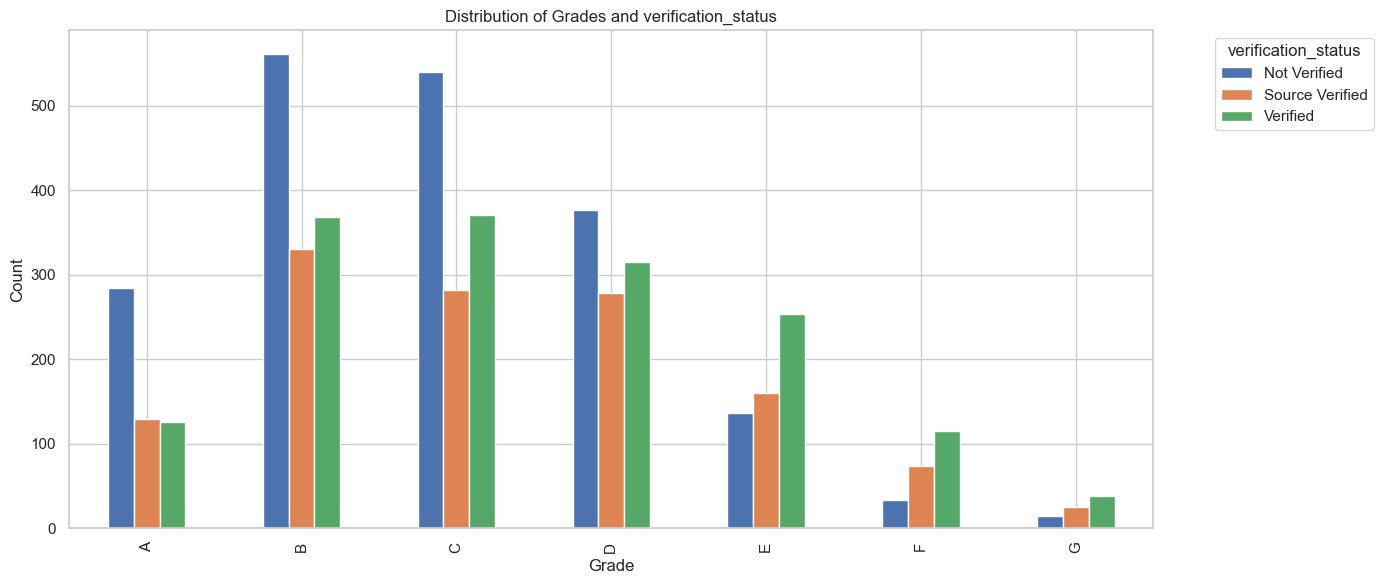

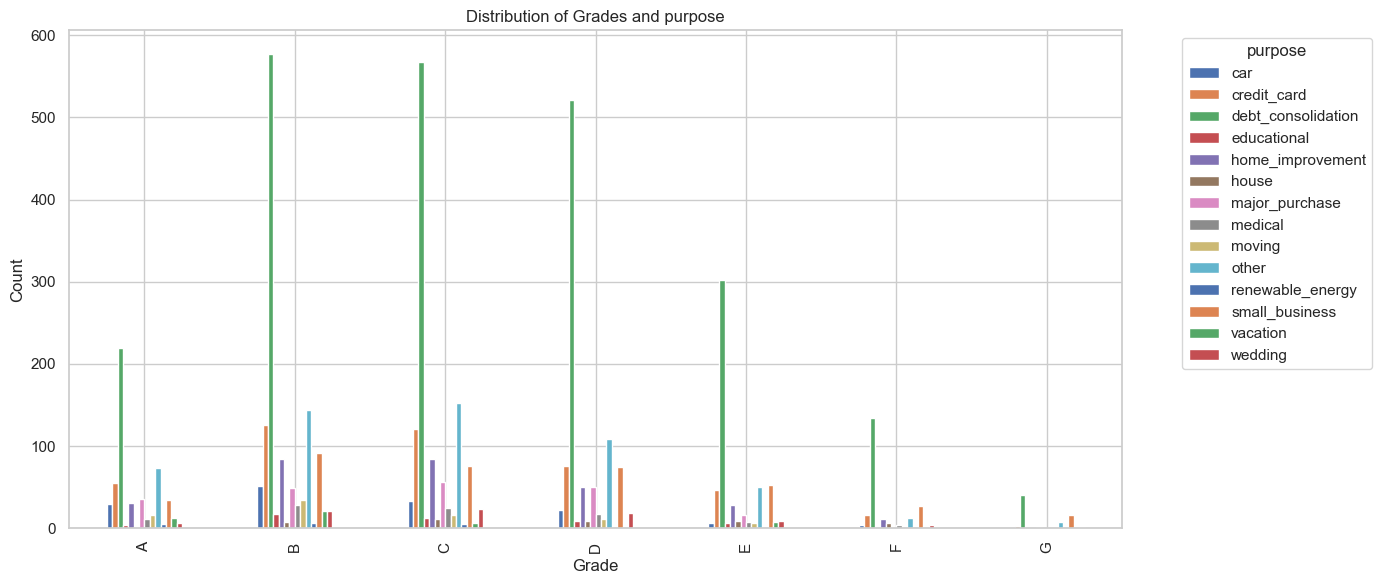

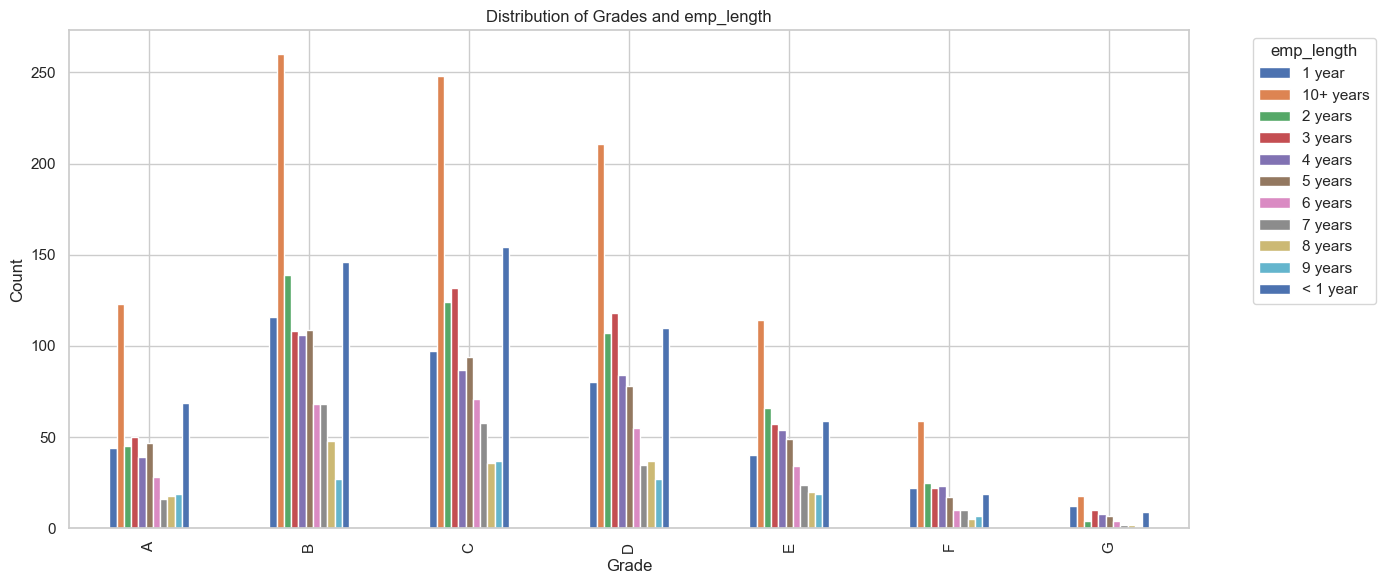

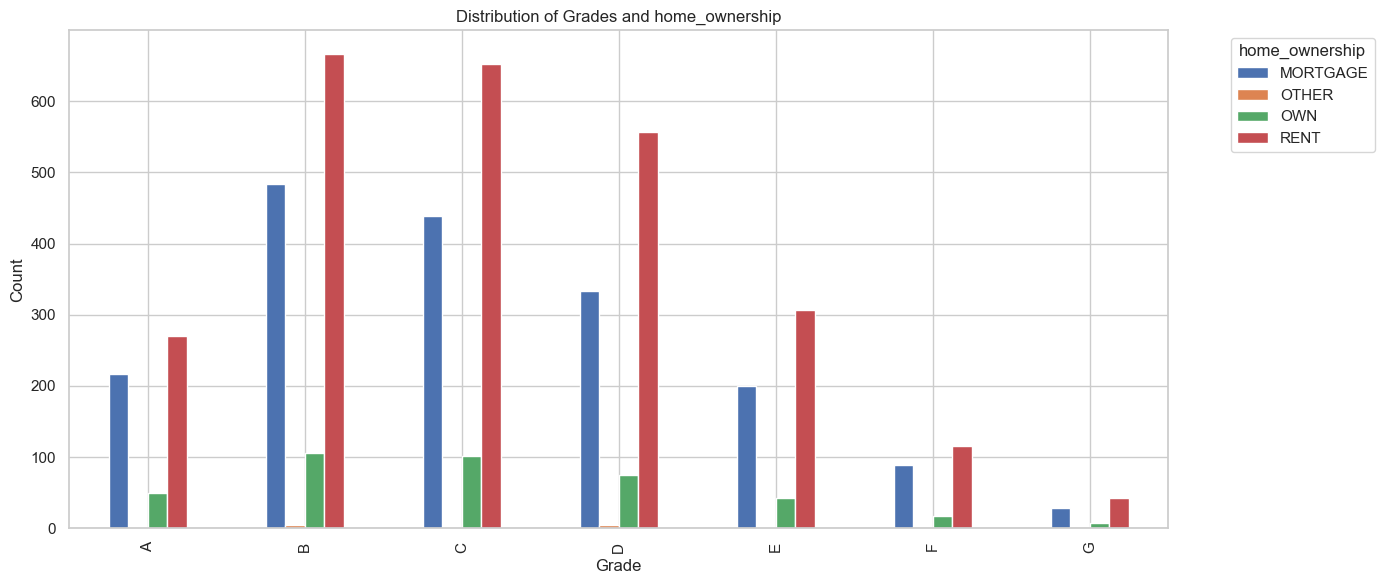

In [41]:
# List of columns to analyze alongside grades
columns_for_analysis = ['verification_status', 'purpose', 'emp_length', 'home_ownership']

# Loop through each column to create and display plots
for col in columns_for_analysis:
    # Create a pivot table counting occurrences
    pivot_table = charged_off_loan_df.pivot_table(index='grade', columns=col, aggfunc='size', fill_value=0)
    
    # Plot the distribution
    ax = pivot_table.plot(kind='bar', figsize=(14, 6))
    plt.title(f'Distribution of Grades and {col}')
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

<h5 style="color:green;">Observations from the plots:</h5>
<ul style="colorgreenn;">
  <li>Verification Status: The "Not Verified" status is prevalent among defaulters across all homeownership types. For RENT homeownership, defaulters are equally distributed between "Source Verified" and "Verified" statuses.</li>
  <li>Purpose: Defaulters most commonly cite "debt_consolidation" as their purpose across all homeownership types. For RENT homeownership, the second most common purpose is "other," while "home_improvement" is second and "credit_card" is third for MORTGAGE homeownership.</li>
  <li>Employment Length: Defaulters with 10+ years of employment length are most common across all homeownership types. For RENT homeownership, the second highest category is "< 1 year" and the third is "2 years," whereas for MORTGAGE homeownership, "3 years" ranks second and "5 years" ranks third.</li>
  <li>Grades: Defaulters are predominantly in grades B and C across all homeownership types.</li>
</ul>


##### Observations from the plots reveal patterns related to employment length among defaulters. 
##### Therefore, we will analyze employment length in conjunction with other categories to identify more significant patterns.

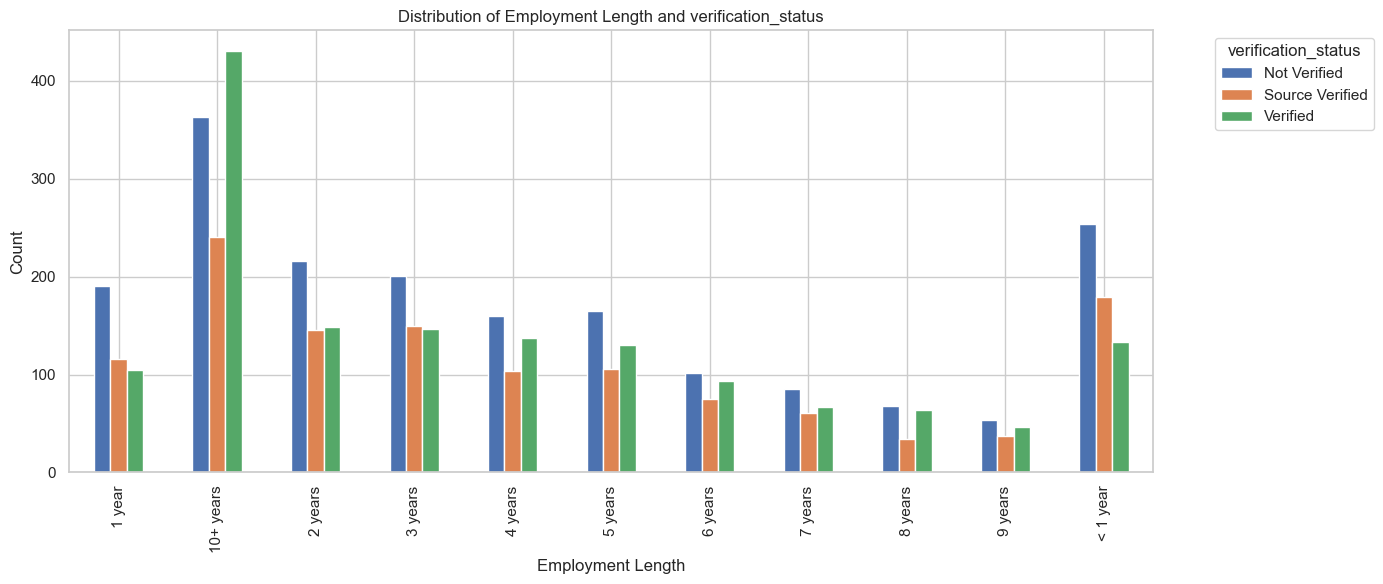

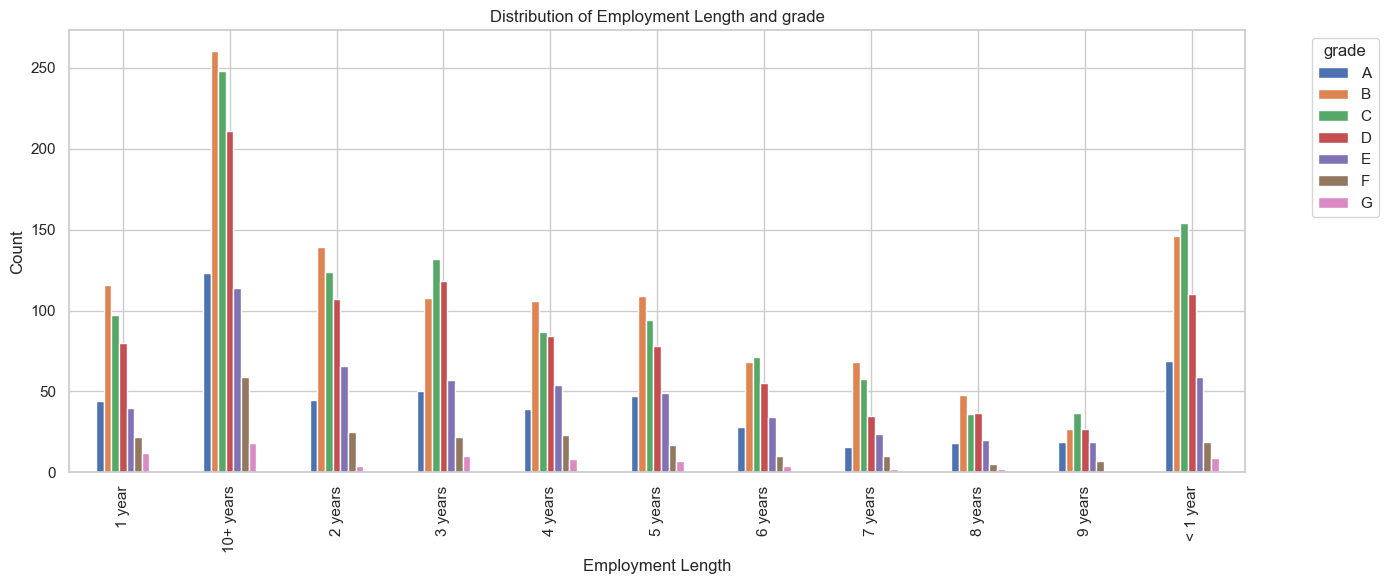

In [42]:
# Columns to analyze alongside employment length
columns_for_analysis = ['verification_status', 'grade']

# Loop through each column to create and display plots
for col in columns_for_analysis:
    # Create a pivot table counting occurrences
    pivot_table = charged_off_loan_df.pivot_table(index='emp_length', columns=col, aggfunc='size', fill_value=0)
    
    # Plot the distribution
    ax = pivot_table.plot(kind='bar', figsize=(14, 6))
    plt.title(f'Distribution of Employment Length and {col}')
    plt.xlabel('Employment Length')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

<h5 style="color:green;">Observations:</h5>
<ul style="colorgreenn;">
    <li>Verification Status: Defaulters with the "Not Verified" status are more common across all employee lengths, except for those with 10+ years of employment, where the "Verified" status is more prevalent.</li>
    <li>Grade Distribution:
        <ul>
            <li>Employee lengths of 1 year, 10+ years, 2 years, 4 years, 5 years, 7 years, and 8 years have a higher number of Grade B defaulters.</li>
            <li>Employee lengths of 3 years, 6 years, 9 years, and less than 1 year show a higher number of Grade C defaulters.</li>
        </ul>
    </li>
</ul>


##### The plots reveal patterns related to the address state of defaulters. 
##### Therefore, we will analyze the address state in conjunction with other categories to uncover more significant patterns.

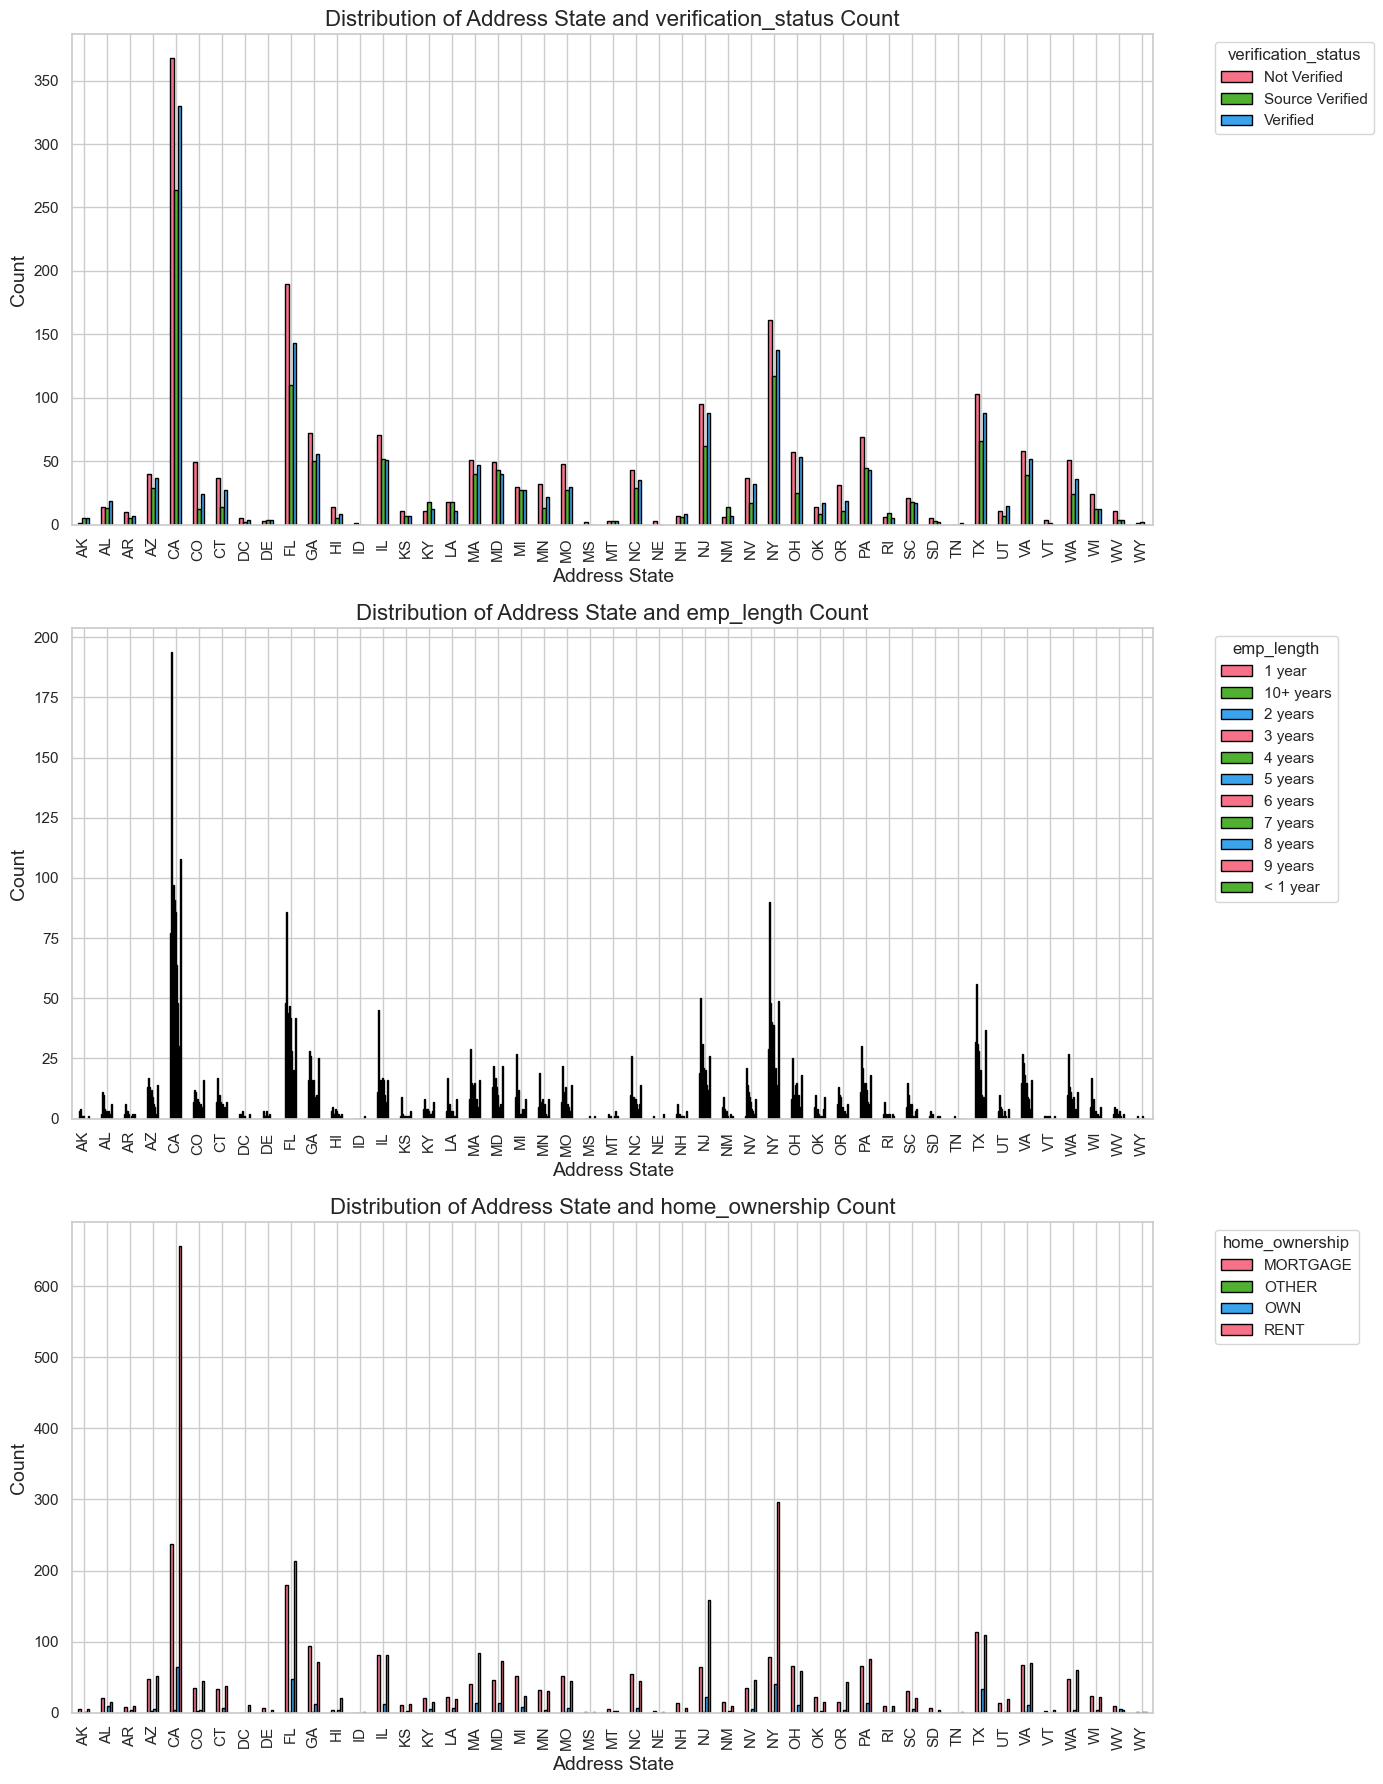

In [43]:
# Columns for analysis
columns_with_addr_states_for_analysis = ['verification_status', 'emp_length', 'home_ownership']

# Set a color palette with distinct colors
palette = sns.color_palette("husl", n_colors=len(columns_with_addr_states_for_analysis))

# Plot settings
fig, axes = plt.subplots(len(columns_with_addr_states_for_analysis), 1, figsize=(14, 18))

# Loop through each column for analysis
for i, col in enumerate(columns_with_addr_states_for_analysis):
    # Create pivot table with counts
    temp_pivot_table = charged_off_loan_df.groupby(['addr_state', col]).size().unstack(fill_value=0)
    
    # Plotting
    temp_pivot_table.plot(kind="bar", ax=axes[i], color=palette, edgecolor='black')
    axes[i].set_title(f'Distribution of Address State and {col} Count', fontsize=16)
    axes[i].set_xlabel('Address State', fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    axes[i].legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<h5 style="color:green;">Observations: The plot above indicates:</h5>
<ul style="colorgreenn;">
    <li>Defaulters with a verification status of "Not Verified" are more prevalent across many states.</li>
    <li>Defaulters with employment lengths of 10+ years and less than 1 year are more common across various states.</li>
    <li>Defaulters with a home ownership status of "RENT" are more frequent across many states, particularly in California (CA).</li>
</ul>


##### Examining patterns among defaulters using the available numerical data.
##### Analyzing both fully paid and defaulted loans to identify patterns.


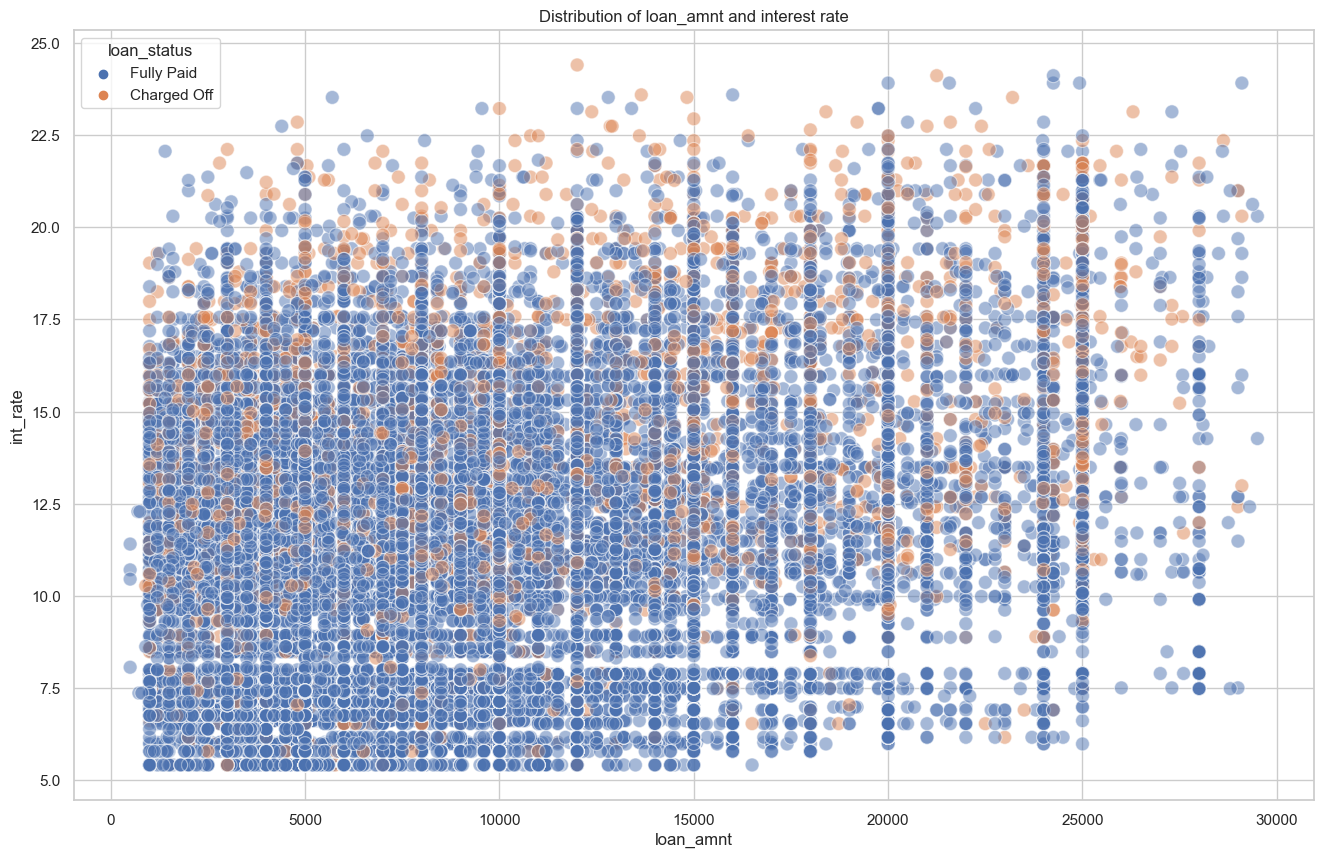

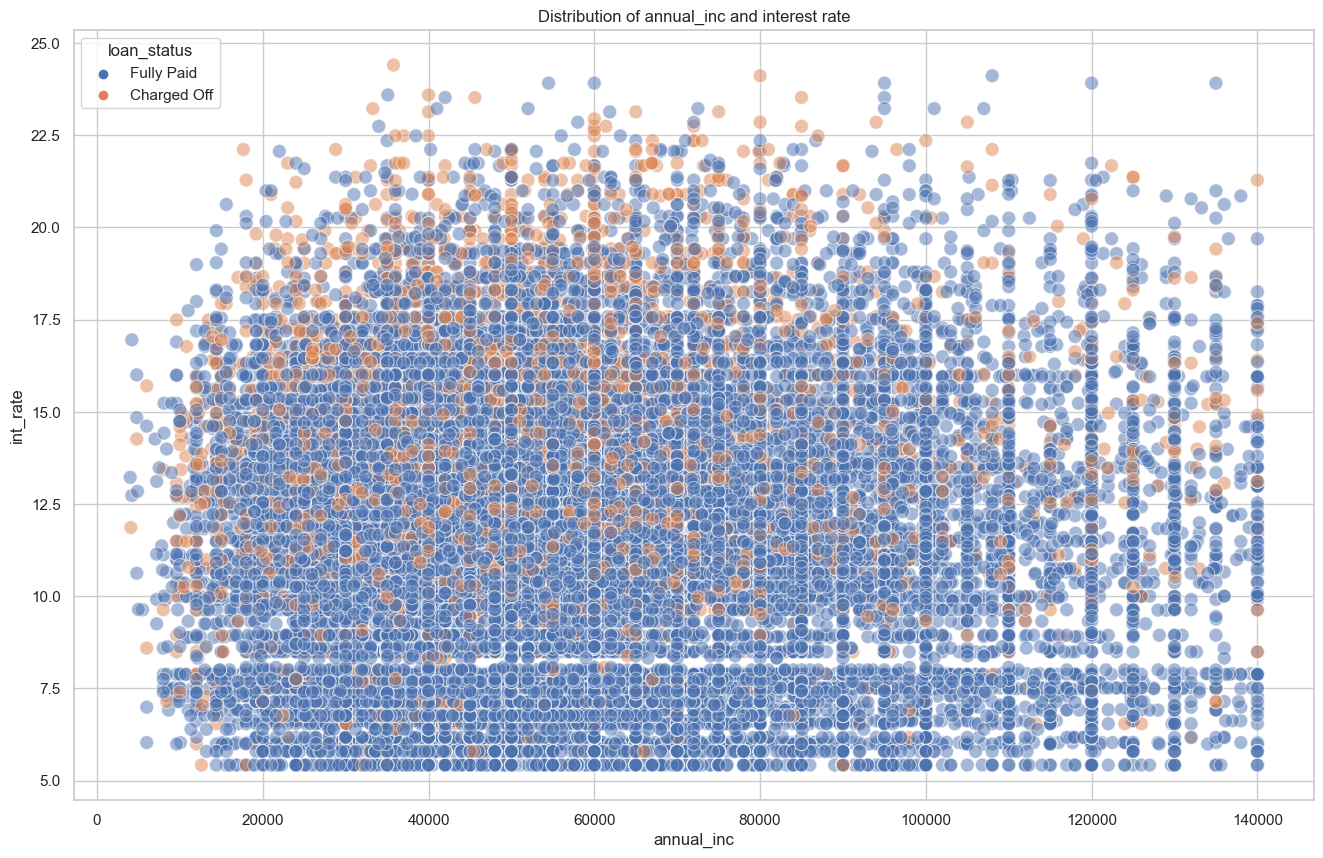

In [44]:

numerical_columns_for_scatter_plot = ['loan_amnt', 'annual_inc']
for column_1 in numerical_columns_for_scatter_plot:
        plt.figure(figsize=(16, 10))
        sns.scatterplot(data = cleaned_loan_df, x=column_1, y="int_rate", hue='loan_status', alpha=0.5, s=100)
        plt.title(f'Distribution of {column_1} and interest rate')
        plt.show()

<h5 style="color:green;">Observations:</h5>
<ul style="colorgreenn;">
  <li>The number of defaulters rises with increasing interest rates, regardless of annual income or loan amount.</li>
  <li>Defaulters tend to increase significantly when interest rates are 12.5% or higher.</li>
  <li>Applicants with lower annual incomes are more likely to default compared to those with higher annual incomes.</li>
</ul>


##### To analyze the correlation between column values, a heatmap of the correlation matrix is plotted.
##### The heatmap illustrates correlations within the charged-off loans dataset.


In [45]:
# Select relevant columns for correlation analysis
columns_for_corr_matrix = ['loan_amnt', 'int_rate', 'grade', 'sub_grade', 'annual_inc', 'dti']
charged_off_loan_for_corr_matrix = charged_off_loan_df[columns_for_corr_matrix]

# Define mappings for grade and sub-grade
grade_mapping = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
subgrade_mapping = {
    'A1': 35, 'A2': 34, 'A3': 33, 'A4': 32, 'A5': 31,
    'B1': 30, 'B2': 29, 'B3': 28, 'B4': 27, 'B5': 26,
    'C1': 25, 'C2': 24, 'C3': 23, 'C4': 22, 'C5': 21,
    'D1': 20, 'D2': 19, 'D3': 18, 'D4': 17, 'D5': 16,
    'E1': 15, 'E2': 14, 'E3': 13, 'E4': 12, 'E5': 11,
    'F1': 10, 'F2': 9, 'F3': 8, 'F4': 7, 'F5': 6,
    'G1': 5, 'G2': 4, 'G3': 3, 'G4': 2, 'G5': 1
}

# Map grades and sub-grades to numeric values
charged_off_loan_for_corr_matrix['grade_numeric'] = charged_off_loan_for_corr_matrix['grade'].map(grade_mapping)
charged_off_loan_for_corr_matrix['subgrade_numeric'] = charged_off_loan_for_corr_matrix['sub_grade'].map(subgrade_mapping)

# Drop original categorical columns
charged_off_loan_for_corr_matrix = charged_off_loan_for_corr_matrix.drop(columns=['grade', 'sub_grade'])

# Compute the correlation matrix
correlation_matrix_for_charged_off = charged_off_loan_for_corr_matrix.corr()

# Display the correlation matrix
correlation_matrix_for_charged_off


loan_amnt  int_rate  annual_inc       dti  grade_numeric  \
loan_amnt          1.000000  0.290733    0.415911  0.067389      -0.274186   
int_rate           0.290733  1.000000    0.113583  0.022701      -0.942963   
annual_inc         0.415911  0.113583    1.000000 -0.078707      -0.115963   
dti                0.067389  0.022701   -0.078707  1.000000       0.001022   
grade_numeric     -0.274186 -0.942963   -0.115963  0.001022       1.000000   
subgrade_numeric  -0.287555 -0.955924   -0.121172 -0.004639       0.980678   

                  subgrade_numeric  
loan_amnt                -0.287555  
int_rate                 -0.955924  
annual_inc               -0.121172  
dti                      -0.004639  
grade_numeric             0.980678  
subgrade_numeric          1.000000

<Axes: >

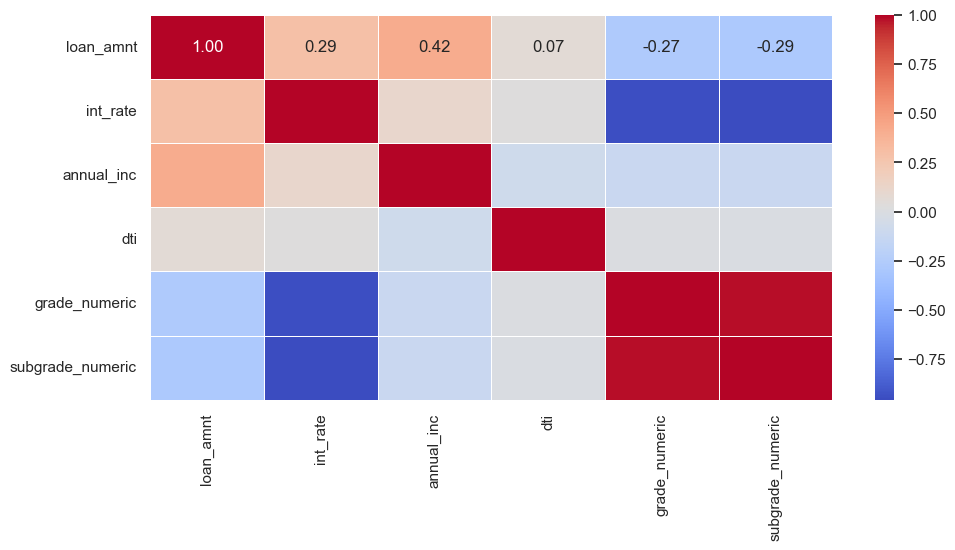

In [46]:
plt.figure(figsize=(11, 5))
sns.heatmap(correlation_matrix_for_charged_off, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

<h5 style="color:green;">Observations:</h5>
<ul style="colorgreenn;">
  <li>The negative correlation between loan amount and grade suggests that lower loan amounts are linked with better grades among defaulters.</li>
  <li>A correlation of 0.37 between loan amount and annual income in the defaulter list shows a moderate positive relationship. This indicates that higher annual income tends to be associated with larger loan amounts for defaulters, though the correlation is not very strong.</li>
  <li>The strong positive correlation between grade and interest rate indicates that higher loan grades are closely associated with lower interest rates among defaulters.</li>
</ul>


## Summary

##### Key Insights from Univariate Analysis:

- **Loan Amounts**: A significant number of defaulters have loan amounts ranging between $3,000 and $12,000.
- **Annual Income**: Many defaulters fall within the annual income bracket of $2,000 to $8,000.
- **DTI (Debt-to-Income) Ratio**: Higher DTI values correlate with an increased number of defaulters.
- **Interest Rates**: Defaulters are more prevalent with interest rates between 10% and 18%.
- **Loan Status Distribution**: The distribution of loan statuses remains consistent across various loan amounts.
- **Interest Rate Comparison**: Defaulters tend to have higher interest rates compared to fully paid loans.
- **Homeownership Status**: The ranking of defaulters by homeownership status is RENT > MORTGAGE > OWN > OTHER.
- **Verification Status**: Defaulters are more commonly not verified, followed by verified, and then source verified.
- **Loan Purpose**: Debt consolidation is the most frequent purpose among defaulters.
- **Employment Length**: A notable proportion of defaulters have more than 10 years of employment.
- **Grade Distribution**: The ranking of defaulters by loan grade is B > C > D > A > E > F > G.
- **Loan Term**: There are more defaulters with a 36-month term compared to a 60-month term.
- **Geographic Distribution**: California has the highest number of defaulters, followed by Florida, New York, Texas, and New Jersey.
- **Monthly Trends**: The number of defaulters is showing a monthly increase.
- **Yearly Trends**: There is an upward trend in the number of defaulters on a yearly basis.
reasing yearly.
number of defaulters is increasing yearly.**


##### Key Insights from Bivariate Analysis:

- **Grades**: Defaulters are predominantly in grades B and C, with subgrades B3, B4, B5, C1, C2, and C3 having the highest number of defaulters.
- **Verification Status**: Across all homeownership types, the "Not Verified" status is most common among defaulters. For RENT homeownership, defaulters are equally distributed between "Source Verified" and "Verified" statuses.
- **Purpose**: Debt consolidation is the most common purpose among defaulters across all homeownership types. For RENT homeownership, the second most common purpose is "other," while for MORTGAGE homeownership, "home improvement" ranks second and "credit card" third.
- **Employment Length**: Defaulters with 10+ years of employment are most common across all homeownership types. For RENT homeownership, the second highest category is "< 1 year" and the third is "2 years," whereas for MORTGAGE homeownership, "3 years" ranks second and "5 years" third.
- **Grades and Verification Status**: For grades A to D, the "Not Verified" status is more common, while for grades E to G, the "Verified" status is more prevalent.
- **Grades and Purpose**: Across all grades, debt consolidation is the most common purpose. For grades A to D, the second most common purpose is "other," whereas for grades E to G, "small business" takes the second spot.
- **Grades and Employment Length**: Defaulters with 10+ years of employment are more common across all grades.
- **Grades and Homeownership**: Defaulters are more commonly associated with RENT and MORTGAGE homeownership.
- **Verification Status by Employment Length**: Across all employment lengths, the "Not Verified" status is more prevalent. However, for employees with 10+ years of experience, the "Verified" status is more common.
- **Employment Length and Grades**: Employment lengths of 1 year, 10+ years, 2 years, 4 years, 5 years, 7 years, and 8 years have more Grade B defaulters, while 3 years, 6 years, 9 years, and less than 1 year have more Grade C defaulters.
- **State Observations**: The "Not Verified" status, employment lengths of 10+ years and less than 1 year, and RENT homeownership are prevalent across many states. Particularly in California (CA), RENT homeownership is the most common among defaulters.
- **Interest Rates and Defaulters**: As interest rates increase, the number of defaulters rises, regardless of annual income and loan amount. Defaulters are more common with interest rates of 12.5% or higher.
- **Annual Income and Defaulters**: Applicants with lower annual incomes are more likely to default compared to those with higher annual incomes.


##### Key Insights from Multivariate Analysis:

- **Loan Amount and Grade**: There is a negative correlation between loan amount and grade, indicating that lower loan amounts are associated with better grades among defaulters.
- **Loan Amount and Annual Income**: With a correlation of 0.37, there is a moderate positive relationship between loan amount and annual income. This suggests that as annual income increases, the loan amount also tends to increase, although the correlation is not very strong.
- **Grade and Interest Rate**: A strong positive correlation exists between grade and interest rate, indicating that higher loan grades are associated with lower interest rates among defaulters.


##### Key Determinants of Loan Defaults:

- **Loan Amount**:
  - **Insight**: Loans between $3,000 and $12,000 are at a higher risk of default.
  - **Analysis**: Smaller loan amounts often correlate with higher risk grades, suggesting increased vigilance for thesae lons.

<br>

- **Annual Income**:
  - **Insight**: Default risk is notably higher for applicants with annual incomes between $2,000 and $8,000.
  - **Analysis**: Lower income levels are a significant predictor of default, while higher incomes are generally associated with larger, less risky loans.

<br>

- **Debt-to-Income (DTI) Ratio**:
  - **Insight**: An elevated DTI ratio is a strong indicator of potential default.
  - **Analysis**: Applicants with higher DTI ratios struggle more with debt management, heightening the risk of default.

<br>

- **Interest Rates**:
  - **Insight**: Higher interest rates (10%-18%) are linked with increased default rates.
  - **Analysis**: Elevated interest rates are often associated with higher-risk loans, requiring careful assessment.

<br>

- **Homeownership**:
  - **Insight**: Renters have the highest default rates, followed by mortgage holders, with homeowners being the least likely to default.
  - **Analysis**: Homeownership status is a critical factor in determining default risk, with renters posing the greatest risk.

<br>

- **Verification Status**:
  - **Insight**: Applicants who are "Not Verified" show a higher likelihood of default.
  - **Analysis**: Ensuring thorough verification can significantly reduce the risk of default.

<br>

- **Purpose of Loan**:
  - **Insight**: Loans for debt consolidation have the highest default rates.
  - **Analysis**: These loans should undergo stringent scrutiny to mitigate associated risks.

<br>

- **Employment Length**:
  - **Insight**: Default rates are notable among applicants with over 10 years of employment and those with very short employment durations.
  - **Analysis**: Employment length should be considered in conjunction with other risk factors for a comprehensive assessment.

<br>

- **Loan Grades**:
  - **Insight**: Grades B and C, particularly subgrades B3, B4, B5, C1, C2, and C3, have the highest default rates.
  - **Analysis**: Loans in these grades need more rigorous evaluation due to their higher default risk.

<br>

- **Loan Term**:
  - **Insight**: Loans with a 36-month term have a higher default rate compared to those with a 60-month term.
  - **Analysis**: The increased monthly payment burden of shorter-term loans contributes to higher default risk.

<br>

- **Geographic Location**:
  - **Insight**: States such as California, Florida, New York, Texas, and New Jersey have the highest default rates.
  - **Analysis**: Regional economic conditions and living costs are significant factors influencing default rates.

<br>

- **Trends Over Time**:
  - **Insight**: Default rates have been rising steadily both on a monthly and yearly basis.
  - **Analysis**: Continuous refinement of risk assessment strategies is essential to adapt to these trends.

<br>

By understanding these key determinants of loan defaults, Lending Club can better identify and mitigate the risks associated with loan defaults, leading to more informed lending decisions and improved financial stability.
nding decisions and improved financial stability.
nding decisions and improved financial stability.
nding decisions and improved financial stability.


##### Recommendations

1. **Strengthen Verification Processes**
   - **Action**: Enhance verification procedures for loan applicants.
   - **Rationale**: By reducing the number of "Not Verified" applicants, default risks can be significantly mitigated.

<br>

2. **Focused Risk Assessment**
   - **Action**: Pay special attention to mid-range loan amounts, lower annual incomes, higher DTI ratios, and elevated interest rates.
   - **Rationale**: These factors are critical indicators of increased default risk and warrant closer scrutiny.

<br>

3. **Develop Geographic and Purpose-Based Policies**
   - **Action**: Implement targeted policies for high-risk geographic regions and specific loan purposes, especially debt consolidation.
   - **Rationale**: Tailored policies address the unique risks associated with different geographic areas and loan purposes.

<br>

4. **Comprehensive Risk Evaluation**
   - **Action**: Integrate various risk factors, such as employment length, loan grade, and term duration, into the evaluation process.
   - **Rationale**: A holistic evaluation approach provides a more accurate assessment of default risk.

<br>

5. **Ongoing Monitoring and Adaptation**
   - **Action**: Regularly review and update risk assessment strategies to align with current trends and emerging data.
   - **Rationale**: Proactive and adaptive strategies will enhance the effectiveness of risk management practices.

<br>

By implementing these recommendations, Lending Club can refine its decision-making process, reduce default rates, and enhance the overall quality of its loan portfolio.
